# TASK 4

In [0]:
import numpy as np
import pandas as pd
from pgmpy.estimators import HillClimbSearch
from pgmpy.estimators import K2Score
from pgmpy.models.BayesianModel import BayesianModel
from sklearn.utils import shuffle
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [0]:
#!pip install pgmpy

In [0]:
seen_data = "seen-dataset/dataset_seen_training_siamese.csv"
seen_validation_data = "seen-dataset/dataset_seen_validation_siamese.csv"
seenValidImagePath  = 'seen-dataset/ValidationSet/'
seenTrainImagePath = 'seen-dataset/TrainingSet/'
shuffled_data = "shuffled-dataset/dataset_seen_training_siamese.csv"
shuffled_validation_data = "shuffled-dataset/dataset_seen_validation_siamese.csv"
shuffledValidImagePath  = 'shuffled-dataset/ValidationSet/'
shuffledTrainImagePath = 'shuffled-dataset/TrainingSet/'
unseen_data = "unseen-dataset/dataset_seen_training_siamese.csv"
unseen_validation_data = "unseen-dataset/dataset_seen_validation_siamese.csv"
unseenValidImagePath  = 'unseen-dataset/ValidationSet/'
unseenTrainImagePath = 'unseen-dataset/TrainingSet/'

In [4]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, BatchNormalization, Activation, Reshape, UpSampling2D
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.layers import Activation, Dense, Flatten
from sklearn.metrics import accuracy_score
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.layers.advanced_activations import LeakyReLU
from keras.utils.vis_utils import plot_model
from keras.callbacks import EarlyStopping, TensorBoard
from keras import optimizers
from PIL import Image
import os
import numpy as np
import imghdr
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score 
from sklearn.metrics import recall_score 

Using TensorFlow backend.


In [0]:
from pathlib import Path

def removeRows(dataset):
  
  for i in range(0,len(dataset)):
    f1 = Path(seenTrainImagePath+dataset['imagename'][i])
    #f2 = Path(seenTrainImagePath+dataset['right'][i])
    
    if(f1.is_file()==False):
      y = dataset.drop(dataset.index[[i]])
      
  return y.reset_index(drop=True)

In [0]:



features_data = pd.read_csv("15features.csv")



In [0]:
def prepareTrainingSet(dataset):
  
  train_x = pd.read_csv("15features.csv")
  #train_x.head(2)
  curFolderPath = dataset 
  imgs =  os.listdir(curFolderPath)
  img_list=np.array(imgs)
  #print(len(imgs))
  img_df=pd.DataFrame(img_list)
  img_df.columns=["imgname"]
  merged = pd.merge(img_df, train_x,left_on = ['imgname'],right_on= ['imagename']
                    ,how = 'inner').drop(['imgname'], axis='columns') 
  
  return merged
  #seen_data_training.shape
  


In [0]:
def generateFeatuereTraininigImageSet(trainingPath,imglist):
    TrainMat  = []
    for img in imglist:
        curImg = trainingPath + '/' + img
        img = Image.open(curImg,'r').convert('L')
        imgdata = (255-np.array(img.getdata()))/255
        TrainMat.append(imgdata)
        
    TrainMat = np.array(TrainMat)
    TrainMat.resize(len(TrainMat),64,64,1)
    print(TrainMat.shape)
    return TrainMat

In [0]:

def prepareValidationSet(dataset):
  
  train_x = pd.read_csv("15features.csv")
  #train_x.head(2)
  curFolderPath = dataset 
  imgs =  os.listdir(curFolderPath)
  img_list=np.array(imgs)
  #print(len(imgs))
  img_df=pd.DataFrame(img_list)
  img_df.columns=["imgname"]
  merged = pd.merge(img_df, train_x,left_on = ['imgname'],right_on= ['imagename']
                    ,how = 'inner').drop(['imgname'], axis='columns') 
  
  return merged

In [0]:
def generateValidationSet(dataset):
    valid_data = pd.read_csv(dataset).drop('Unnamed: 0', axis=1)
    valid_data = shuffle(valid_data).reset_index(drop=True)
    leftImg = valid_data['left']
    rightImg = valid_data['right']
    target = valid_data['label']
    return leftImg,rightImg,target

In [0]:
def generateData(dataset):
    
    
    sameDiffPair = pd.read_csv(dataset)
    sameDiffPair = sameDiffPair.drop('Unnamed: 0', axis=1)
    

    samePair = sameDiffPair.loc[sameDiffPair['label'] == 1].reset_index(drop=True)
    diffPair = sameDiffPair.loc[sameDiffPair['label'] == 0].reset_index(drop=True)

    #print(samePair.shape) 
    #print(diffPair.shape)
    merged1 = pd.merge(samePair, andTable1, left_on = ['left'],right_on= ['imagename'],how = 'left').drop(['imagename'], axis='columns')
    merged2 = pd.merge(samePair, andTable2, left_on = ['right'],right_on= ['imagename'],how = 'left').drop(['imagename','left','right','label'],axis='columns')
    merged3=pd.concat([merged1, merged2],axis=1)
    merged3= merged3.drop(['left','right'], axis='columns')
    merged4 = pd.merge(diffPair, andTable1, left_on = ['left'],right_on= ['imagename'],how = 'left').drop(['imagename'], axis='columns')
    merged5 = pd.merge(diffPair, andTable2, left_on = ['right'],right_on= ['imagename'],how = 'left').drop(['imagename','left','right','label'],axis='columns')
    merged6=pd.concat([merged4, merged5],axis=1)
    merged6= merged6.drop(['left','right'], axis='columns')
    concatFeatures=pd.concat([merged3,merged6],axis = 0) 
    
    concatFeatures = concatFeatures.dropna()
    print(concatFeatures.shape)
    concatFeatures=shuffle(concatFeatures)
    return concatFeatures


In [0]:
def generateVaildationImageSet(validationImagePath,leftImg,rightImg):
    LeftMat  = []
    RightMat  = []
    #seenValidPath  = 'seen-dataset/ValidationSet/'
    for i in range(0,len(leftImg)):
        imgLeft  = Image.open(validationImagePath + leftImg[i],'r').convert('L')
        imgRight  = Image.open(validationImagePath + rightImg[i],'r').convert('L')
        imgLeftdata = (255-np.array(imgLeft.getdata()))/255
        imgRightdata = (255-np.array(imgRight.getdata()))/255
        LeftMat.append(imgLeftdata)
        RightMat.append(imgRightdata)
        
    LeftMat = np.array(LeftMat)
    LeftMat.resize(len(LeftMat),64,64,1)
    print(LeftMat.shape)

    RightMat = np.array(RightMat)
    RightMat.resize(len(RightMat),64,64,1)
    print(RightMat.shape)
    return LeftMat,RightMat

In [0]:
def generateTraininigImageSet(trainingPath):
    TrainMat  = []
    #curPath  = 'seen-dataset/TrainingSet/'
    curFolderPath = trainingPath 
    imgs =  os.listdir(curFolderPath)
    for img in imgs:
        curImg = curFolderPath + '/' + img
        img = Image.open(curImg,'r').convert('L')
        imgdata = (255-np.array(img.getdata()))/255
        TrainMat.append(imgdata)
        
    TrainMat = np.array(TrainMat)
    TrainMat.resize(len(TrainMat),64,64,1)
    print(TrainMat.shape)
    return TrainMat

In [0]:

def normalizeData(data_feature):
    columns=data_feature.columns
    len(columns)
    for i in range(1,len(columns)):
        data_feature[columns[i]]=data_feature[columns[i]]-1
    
    return data_feature


# AUTOENCODER

In [0]:
def createAutoEncoder():
    input_img = Input(shape=(64, 64, 1))  # adapt this if using `channels_first` image data format
    # x = CoordinateChannel2D()(input_img)
    x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
    x = MaxPooling2D((2, 2), padding='same')(x)
    # x = CoordinateChannel2D()(x)
    x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2), padding='same')(x)
    # x = CoordinateChannel2D()(x)
    x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
    encoded = MaxPooling2D((2, 2), padding='same')(x)
    encoded = Flatten()(x)
    encoded = Dense(8*8*8, activation='relu', name='latent')(encoded)
    # model = Model(input_img,encoded)
    # print(model.summary())
    # at this point the representation is (4, 4, 8) i.e. 128-dimensional
    r = Reshape(target_shape=(8,8,8))(encoded)
    x = Conv2D(8, (3, 3), activation='relu', padding='same')(r)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)
    decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same',name='output')(x)

    autoencoder = Model(input_img, decoded)
    
    autoencoder.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
    autoencoder.summary()
    return autoencoder

In [0]:
from keras.preprocessing.image import ImageDataGenerator
def runAutoncoder(TrainMat,autoencoder):
    
    no_epochs = 15
    batch = 32
    valid_percent = 20
    train_len = int(((100-valid_percent)/100)*len(TrainMat))
    valid_len = len(TrainMat) - train_len
 
    # construct the training image generator for data augmentation
    aug = ImageDataGenerator(rotation_range=20, zoom_range=0.15,
        width_shift_range=0.2, height_shift_range=0.2, shear_range=0.15,
        horizontal_flip=True, fill_mode="nearest")

    valid_gen = aug.flow(TrainMat[valid_len:len(TrainMat)],
                     TrainMat[valid_len:len(TrainMat)], batch_size=batch)

    # train the network
    history = autoencoder.fit_generator(aug.flow(TrainMat[0:train_len], TrainMat[0:train_len], batch_size=batch)
        , steps_per_epoch=len(TrainMat[0:train_len]) // batch,
        epochs=no_epochs,validation_data=valid_gen,validation_steps=valid_len // batch)
    
    #autoencoder.save('seenautoencoder.h5')
    return history,autoencoder

### SEEN DATASET

In [23]:
seenLeftImg,seenRightImg,seenTarget = generateValidationSet(seen_validation_data)
seenLeftMat,seenRightMat = generateVaildationImageSet(seenValidImagePath,seenLeftImg,seenRightImg)
seenTrainMat = generateTraininigImageSet(seenTrainImagePath)

(906, 64, 64, 1)
(906, 64, 64, 1)
(12846, 64, 64, 1)


In [24]:
seenAutoencoder = createAutoEncoder()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 64, 64, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 8)         1160      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 8)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 8)         584       
_________________________________________________________________
flat

In [98]:
seenHistory,seenTrainedAutoencoder = runAutoncoder(seenTrainMat,seenAutoencoder)
seenTrainedAutoencoder.save('seenautoencoder.h5')

Epoch 1/15
321/321 [==============================] - 89s 276ms/step - loss: 0.1911 - acc: 0.8887 - val_loss: 0.1680 - val_acc: 0.8896
Epoch 2/15
321/321 [==============================] - 82s 256ms/step - loss: 0.1666 - acc: 0.8889 - val_loss: 0.1644 - val_acc: 0.8888
Epoch 3/15
321/321 [==============================] - 83s 257ms/step - loss: 0.1649 - acc: 0.8888 - val_loss: 0.1652 - val_acc: 0.8878
Epoch 4/15
321/321 [==============================] - 83s 259ms/step - loss: 0.1638 - acc: 0.8888 - val_loss: 0.1654 - val_acc: 0.8873
Epoch 5/15
321/321 [==============================] - 83s 257ms/step - loss: 0.1628 - acc: 0.8888 - val_loss: 0.1632 - val_acc: 0.8884
Epoch 6/15
321/321 [==============================] - 83s 258ms/step - loss: 0.1622 - acc: 0.8888 - val_loss: 0.1639 - val_acc: 0.8876
Epoch 7/15
321/321 [==============================] - 83s 259ms/step - loss: 0.1619 - acc: 0.8887 - val_loss: 0.1603 - val_acc: 0.8892
Epoch 8/15
321/321 [==============================] - 8

In [0]:
#seenAutoencoder.load_weights('seenautoencoder.h5')
#seenTrainedAutoencoder=seenAutoencoder

In [28]:
seenEncoder = Model(seenTrainedAutoencoder.inputs, seenTrainedAutoencoder.get_layer('latent').output)
seenEncoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 64, 64, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 8)         1160      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 8)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 8)         584       
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)              0         
__________

In [0]:
from keras.optimizers import Adadelta, SGD, Adam
def genFeatureModel(TrainingData,OutputLayer):
  
    EPOCHS = 500
    INIT_LR = 0.0001
    opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
    input_size = TrainingData.shape[1]
    drop_out = 0.2
    first_dense_layer_nodes  = 512 
    second_dense_layer_nodes = 64
    
    third_dense_layer_nodes = OutputLayer


    model = Sequential()
    model.add(Dense(first_dense_layer_nodes, input_dim=input_size))
    model.add(Activation('relu'))
    model.add(Dropout(drop_out))
    
    model.add(Dense(second_dense_layer_nodes, input_dim=input_size))
    model.add(Activation('relu'))
    model.add(Dropout(drop_out))



    model.add(Dense(third_dense_layer_nodes))
    model.add(Activation('softmax'))


    model.compile(optimizer=opt,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    model.summary()
    return model

In [30]:
mergedSeen = prepareTrainingSet(seenTrainImagePath)
mergedSeen = normalizeData(mergedSeen)
imglist = mergedSeen['imagename']
mergedSeen.shape

(12630, 16)

In [31]:

encSeenTrain = generateFeatuereTraininigImageSet(seenTrainImagePath,imglist)


(12630, 64, 64, 1)


In [0]:
predictedSeen = seenEncoder.predict(encSeenTrain)

In [33]:
predictedSeen.shape

(12630, 512)

In [34]:
dataset_columns = features_data.columns
feature_lengths = {}
for col in dataset_columns[1:]:
    feature_lengths[col] = len(features_data[col].unique())
feature_lengths = list(feature_lengths.values())
feature_lengths

[2, 3, 3, 3, 2, 2, 4, 2, 2, 4, 2, 3, 4, 2, 2]

In [35]:
seen_feature_models=[]
for i in range(0,len(feature_lengths)):
  seen_feature_models.append(genFeatureModel(predictedSeen,feature_lengths[i]))
  

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                32832     
_________________________________________________________________
activation_2 (Activation)    (None, 64)                0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
___________________________

In [0]:
from keras.utils import np_utils
def runFeatureModel(train_data,train_target,model,output_layer,data,feature):
    
    validation_data_split = 0.2 # This is the validation data split ratio from the training set .This means last 20% of
# data will be used as the validation set.
    num_epochs = 500 # epochs are the number of datasets given to the model to learn.Changing to 1000 for 3 dense layers
# as accuracy is reaching 0.99 in the first 200 epochs only   
    model_batch_size = 100 # No of training examples used per iteration
    tb_batch_size = 32 # batch_size used in callback functions to get the statistics of the model that is getting trained
    early_patience = 25 # no of epochs with no improvement after which training is stopped

# EarlyStopping is used to stop the training when a monitored value stops improving.
    tensorboard_cb   = TensorBoard(log_dir='logs', batch_size= tb_batch_size, write_graph= True)
    earlystopping_cb = EarlyStopping(monitor='val_loss', verbose=1, patience=early_patience, mode='min')

    TrainingData = train_data
    TrainingTarget = train_target
    TargetVector = np_utils.to_categorical(TrainingTarget,output_layer)
    #print(TrainingData)
    history = model.fit(TrainingData
                    , TargetVector
                    , validation_split=validation_data_split
                    , epochs=num_epochs
                    , batch_size=model_batch_size
                    , callbacks = [tensorboard_cb,earlystopping_cb]
                   )
    model.save(data+feature+'_model.h5')
    return history



In [0]:
#for i in range(0,len(seen_feature_models)):
#  seen_feature_models[i].load_weights('seen'+str(i)+'_model.h5')
f_cols = mergedSeen.columns[1:]

In [108]:
f_cols = mergedSeen.columns[1:]
history = []
for i in range(0,len(seen_feature_models)):
  history.append(runFeatureModel(predictedSeen,mergedSeen[f_cols[i]],seen_feature_models[i],feature_lengths[i],'seen',str(i)))

Train on 10104 samples, validate on 2526 samples
Epoch 1/500
10104/10104 [==============================] - 3s 271us/step - loss: 0.5983 - acc: 0.6998 - val_loss: 0.4435 - val_acc: 0.7949
Epoch 2/500
10104/10104 [==============================] - 1s 139us/step - loss: 0.4658 - acc: 0.7773 - val_loss: 0.4121 - val_acc: 0.8100
Epoch 3/500
10104/10104 [==============================] - 1s 141us/step - loss: 0.4350 - acc: 0.7961 - val_loss: 0.3870 - val_acc: 0.8226
Epoch 4/500
10104/10104 [==============================] - 1s 132us/step - loss: 0.4195 - acc: 0.8049 - val_loss: 0.3769 - val_acc: 0.8282
Epoch 5/500
10104/10104 [==============================] - 1s 131us/step - loss: 0.4085 - acc: 0.8117 - val_loss: 0.3735 - val_acc: 0.8286
Epoch 6/500
10104/10104 [==============================] - 1s 124us/step - loss: 0.3934 - acc: 0.8167 - val_loss: 0.3622 - val_acc: 0.8306
Epoch 7/500
10104/10104 [==============================] - 1s 126us/step - loss: 0.3859 - acc: 0.8225 - val_loss: 0.3

In [39]:
seenValidSet = prepareValidationSet(seenValidImagePath)
seenValidSet = normalizeData(seenValidSet)
validimglist = seenValidSet['imagename']
validImgMatrix = generateFeatuereTraininigImageSet(seenValidImagePath,validimglist)

(944, 64, 64, 1)


In [40]:
seen_img_encoded = seenEncoder.predict(validImgMatrix)
seen_img_encoded.shape

(944, 512)

In [0]:
def getAccuracy(model,seen_img_encoded,seenValidSet,columns):
  
  predicted = model.predict(seen_img_encoded)
  count = 0
  for i in range(0,len(predicted)):
    pred = predicted[i].argmax()
    if(pred == seenValidSet[columns][i]):
      count = count+1

  return(count/len(predicted))*100    
    

In [0]:
accuracy = []
for i in range(0,len(seen_feature_models)):
  accuracy.append(getAccuracy(seen_feature_models[i],seen_img_encoded,seenValidSet,f_cols[i]))

In [113]:
for i in range(0,len(accuracy)):
  print(f_cols[i]+" Accuracy :"+ str(accuracy[i]))

print("-------------------------------------------------------------")
print("Overall Accuracy : ", sum(accuracy)/len(accuracy))

pen_pressure Accuracy :84.53389830508475
letter_spacing Accuracy :56.25
size Accuracy :77.96610169491525
dimension Accuracy :71.61016949152543
is_lowercase Accuracy :99.15254237288136
is_continuous Accuracy :82.62711864406779
slantness Accuracy :73.19915254237289
tilt Accuracy :88.02966101694916
entry_stroke_a Accuracy :97.98728813559322
staff_of_a Accuracy :64.19491525423729
formation_n Accuracy :82.09745762711864
staff_of_d Accuracy :80.1906779661017
exit_stroke_d Accuracy :63.66525423728814
word_formation Accuracy :67.47881355932203
constancy Accuracy :70.33898305084746
-------------------------------------------------------------
Overall Accuracy :  77.28813559322035


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f6716cd9eb8>,
      dtype=object)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f671b14ec50>,
      dtype=object)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f671ad7fda0>,
      dtype=object)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f671ac5ef60>,
      dtype=object)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f671ab50a20>,
      dtype=object)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f671a86f630>,
      dtype=object)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f671a72f1d0>,
      dtype=object)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f671a3d3a58>,
      dtype=object)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f671a2b7c18>,
      dtype=object)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f671a13a0f0>,
      dtype=object)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f67196f8908>,
      dtype=object)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f671956b198>,
      dtype=object)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f67192355c0>,
      dtype=object)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f67190a32e8>,
      dtype=object)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f6718de4710>,
      dtype=object)

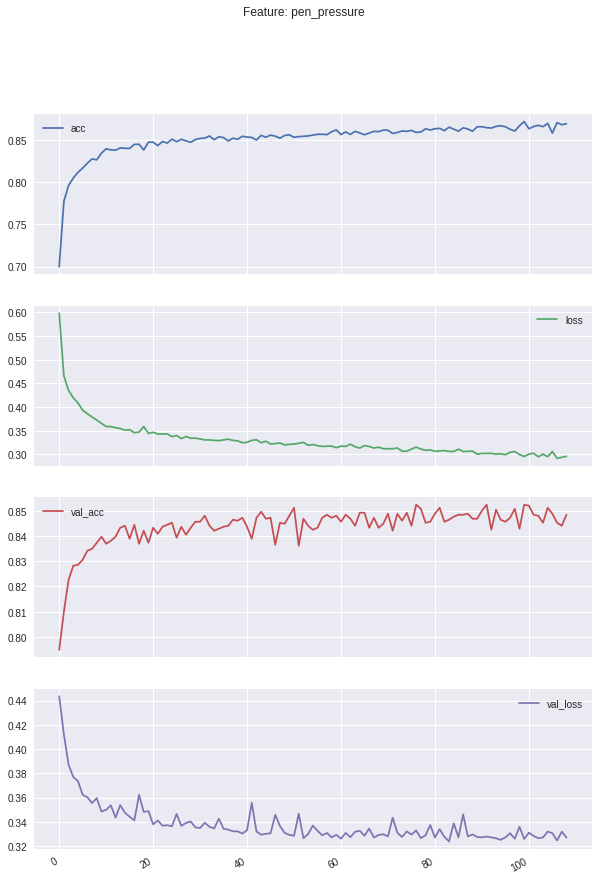

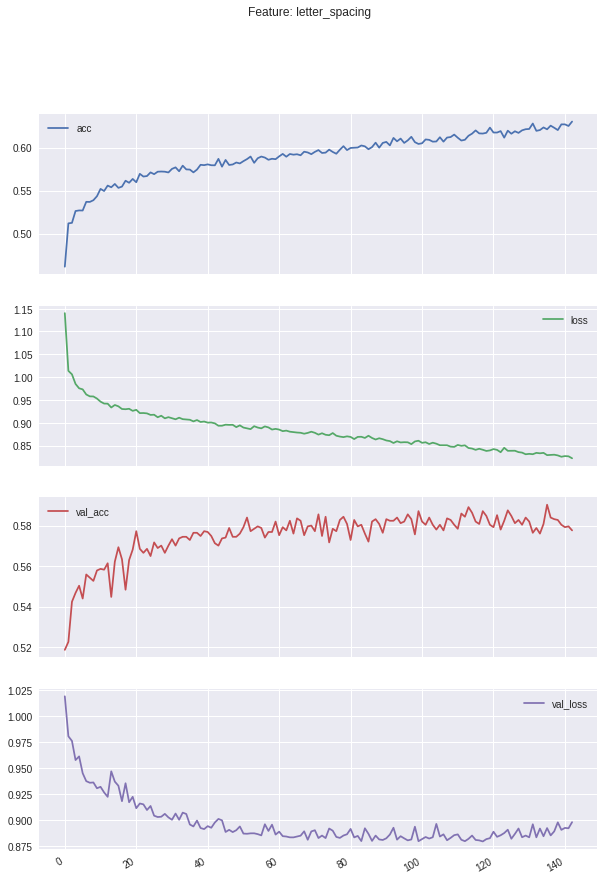

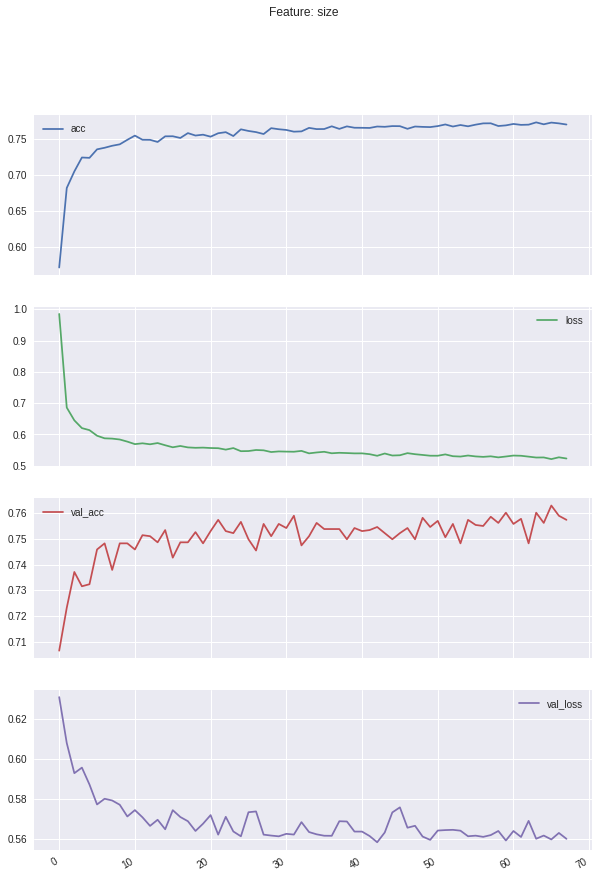

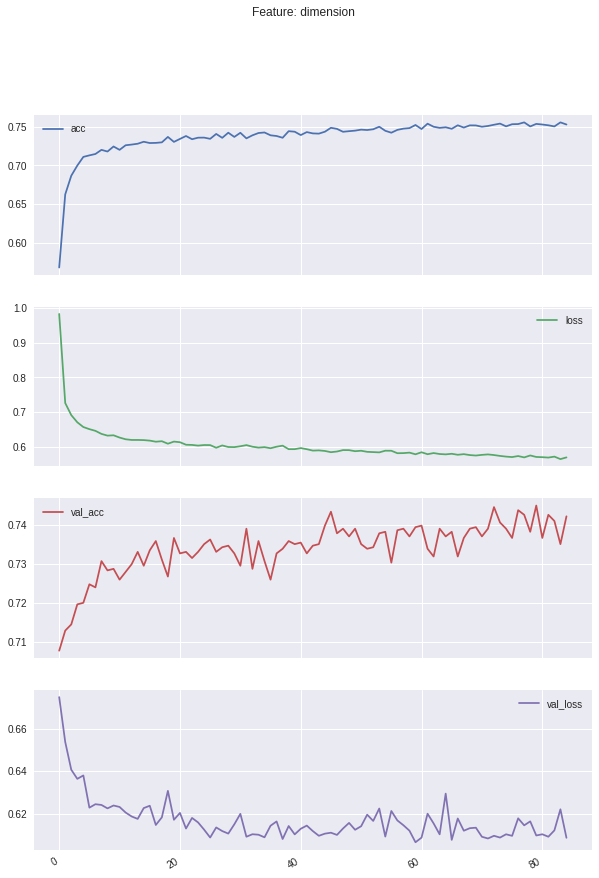

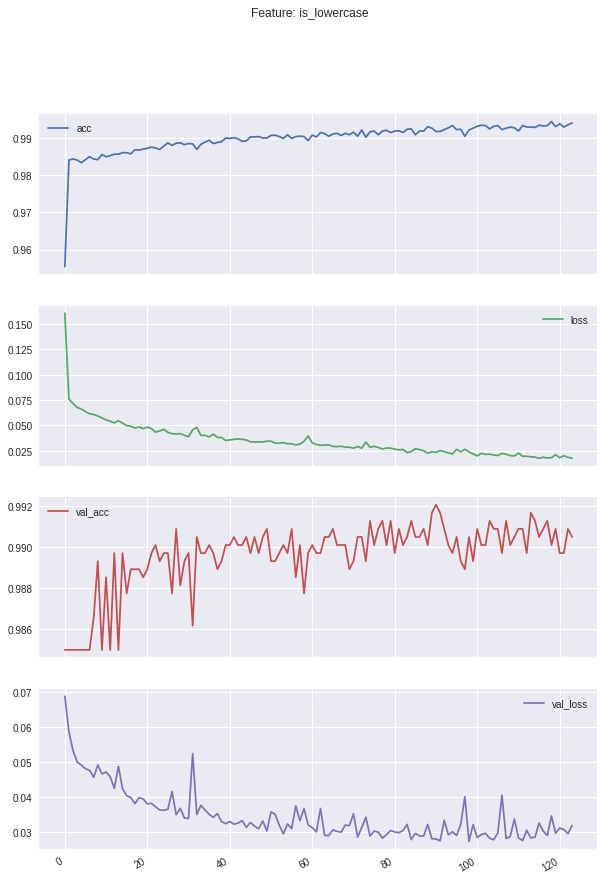

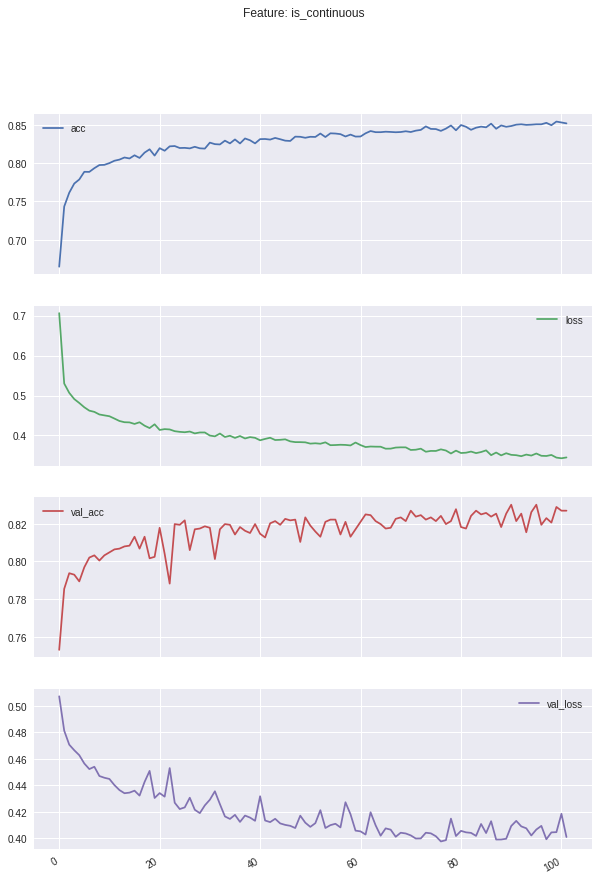

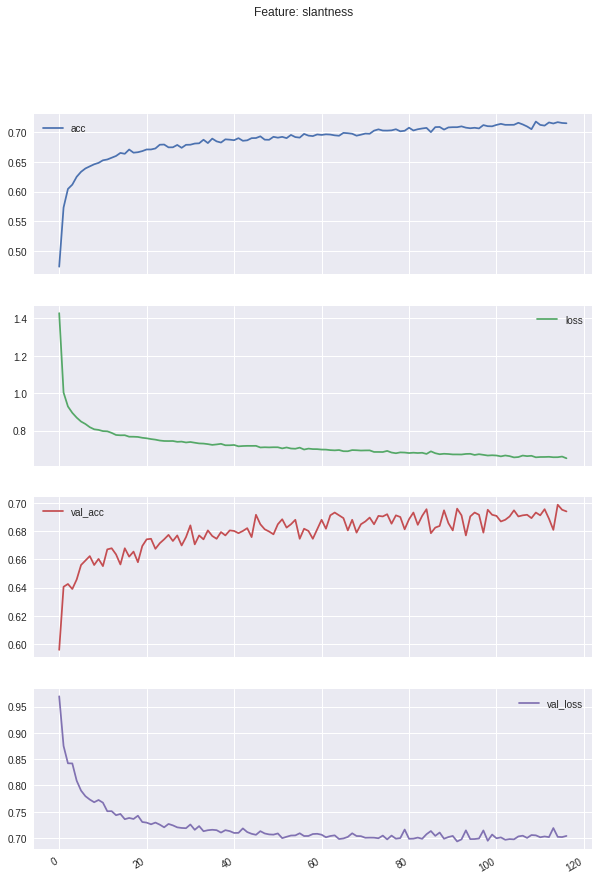

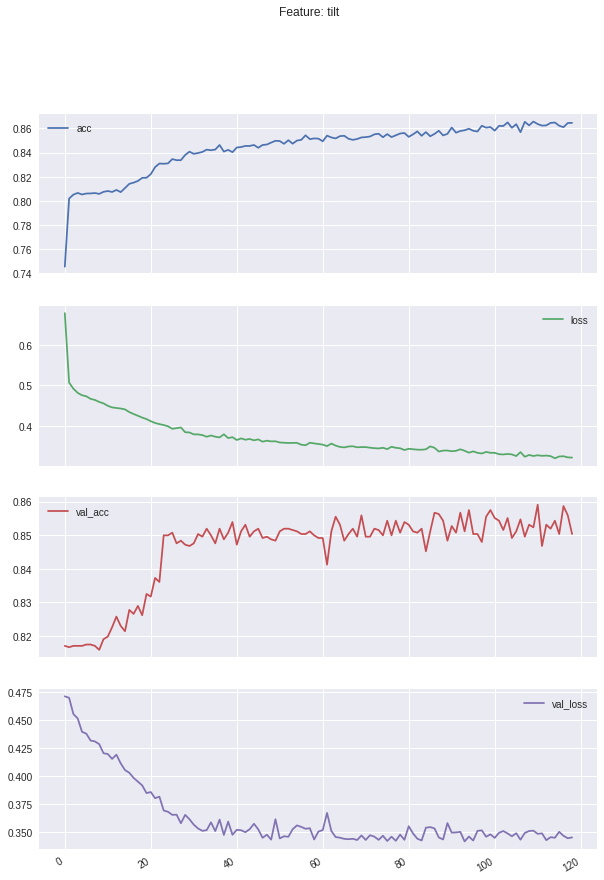

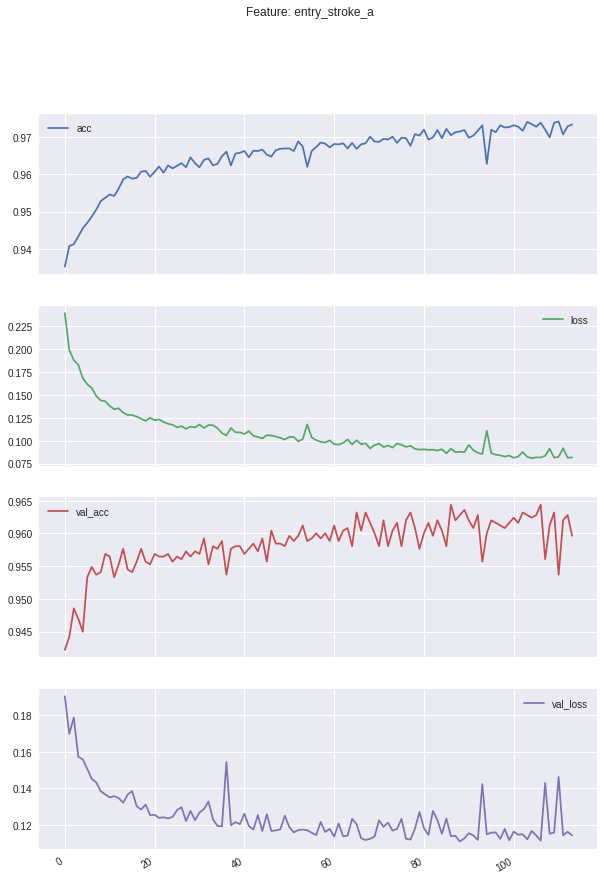

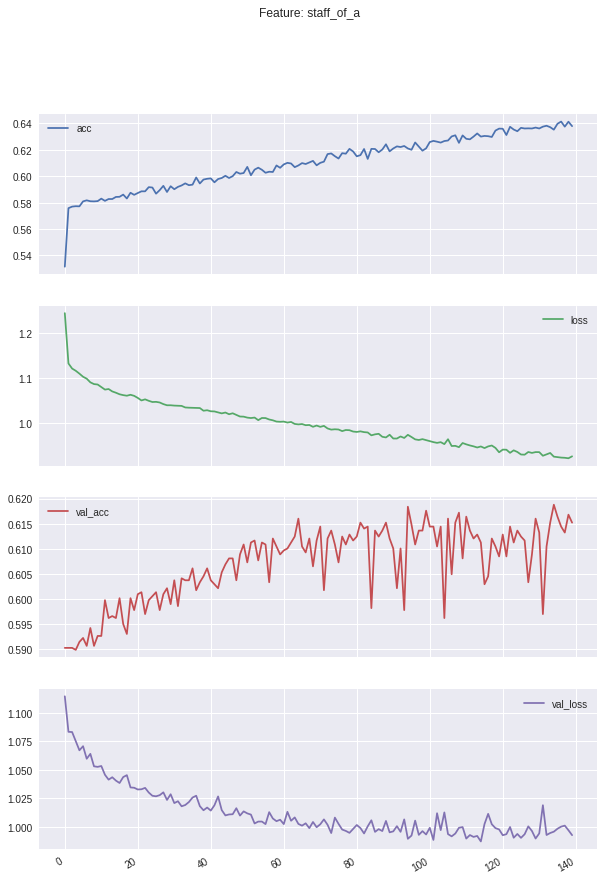

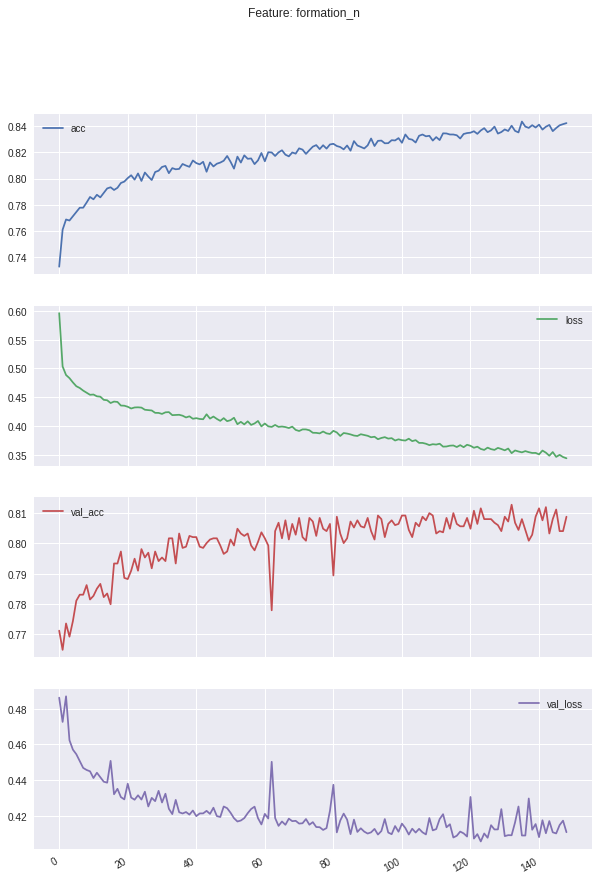

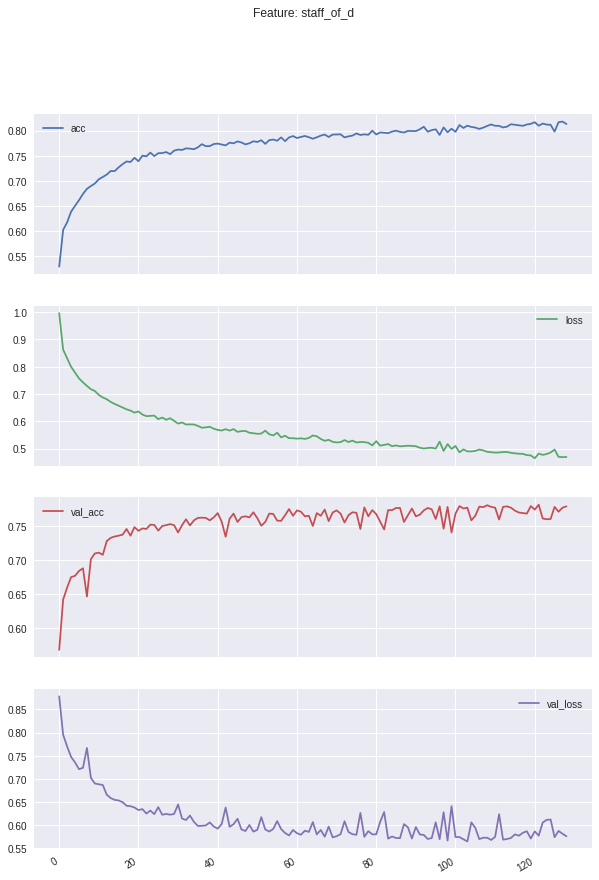

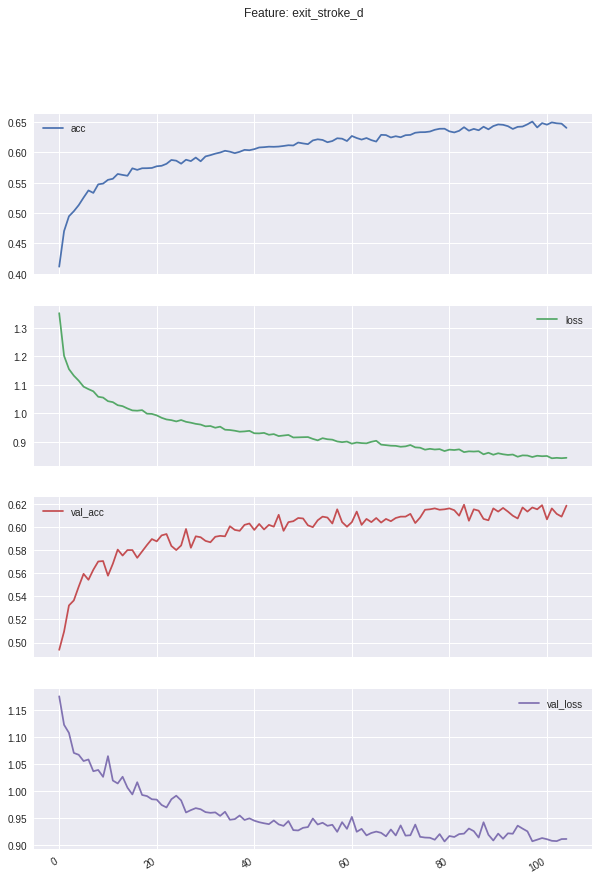

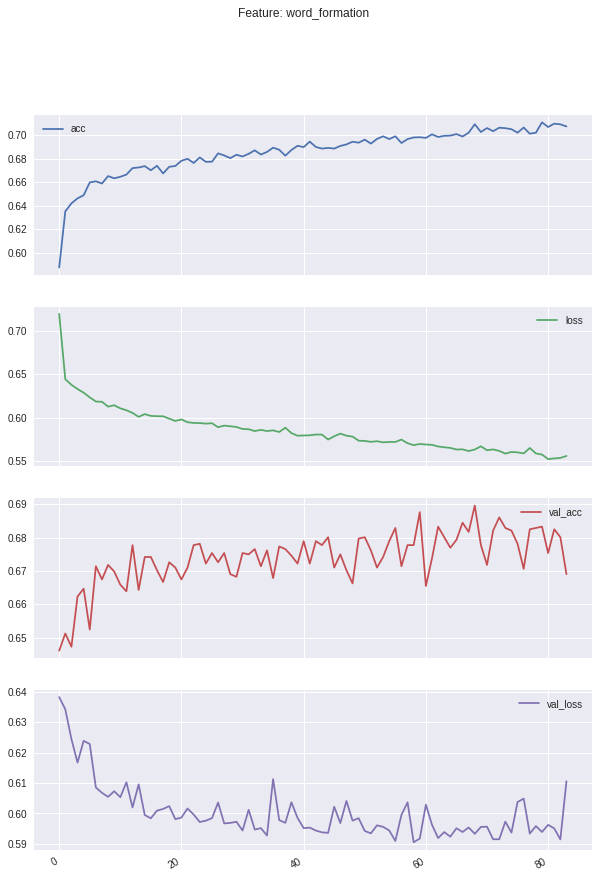

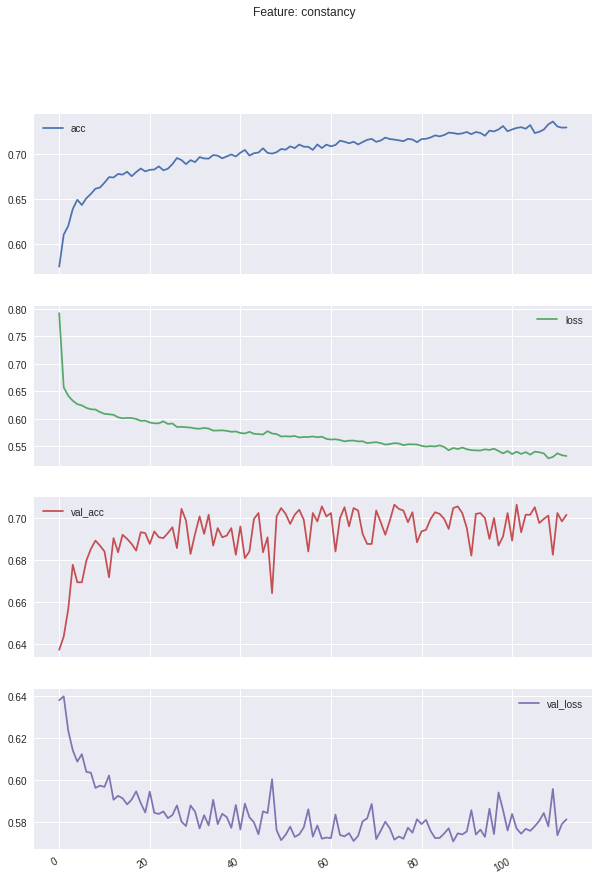

In [114]:
%matplotlib inline
for i in range(0,len(history)):
  h = history[i]
  df = pd.DataFrame(h.history)
  df.plot(subplots=True, grid=True,title = 'Feature: '+f_cols[i],figsize=(10,15))
  #df = pd.DataFrame(h.history)
  #df.plot(subplots=True, grid=True,title = 'Feature: '+f_cols[i])

In [0]:
#seen_left_img_encoded = seenEncoder.predict(seenLeftMat)
#seen_right_img_encoded = seenEncoder.predict(seenRightMat)

# SHUFFLED DATASET

In [45]:
shuffledLeftImg,shuffledRightImg,shuffledTarget = generateValidationSet(shuffled_validation_data)
shuffledLeftMat,shuffledRightMat = generateVaildationImageSet(shuffledValidImagePath,shuffledLeftImg,shuffledRightImg)
shuffledTrainMat = generateTraininigImageSet(shuffledTrainImagePath)

(5288, 64, 64, 1)
(5288, 64, 64, 1)
(11823, 64, 64, 1)


In [91]:
shuffledAutoencoder = createAutoEncoder()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 64, 64, 1)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 64, 64, 16)        160       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 32, 32, 8)         1160      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 8)         0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 16, 16, 8)         584       
_________________________________________________________________
flatten_2 (Flatten)          (None, 2048)              0         
__________

In [118]:
shuffledhistory,shuffledTrainedAutoencoder = runAutoncoder(shuffledTrainMat,shuffledAutoencoder)
shuffledTrainedAutoencoder.save('shuffledTrainedAutoencoder.h5')

Epoch 1/15
295/295 [==============================] - 85s 287ms/step - loss: 0.1880 - acc: 0.8903 - val_loss: 0.1619 - val_acc: 0.8927
Epoch 2/15
295/295 [==============================] - 76s 258ms/step - loss: 0.1623 - acc: 0.8918 - val_loss: 0.1616 - val_acc: 0.8915
Epoch 3/15
295/295 [==============================] - 76s 258ms/step - loss: 0.1611 - acc: 0.8916 - val_loss: 0.1604 - val_acc: 0.8917
Epoch 4/15
295/295 [==============================] - 76s 257ms/step - loss: 0.1597 - acc: 0.8917 - val_loss: 0.1620 - val_acc: 0.8895
Epoch 5/15
295/295 [==============================] - 77s 262ms/step - loss: 0.1589 - acc: 0.8916 - val_loss: 0.1586 - val_acc: 0.8908
Epoch 6/15
295/295 [==============================] - 76s 258ms/step - loss: 0.1581 - acc: 0.8916 - val_loss: 0.1571 - val_acc: 0.8922
Epoch 7/15
295/295 [==============================] - 76s 257ms/step - loss: 0.1575 - acc: 0.8916 - val_loss: 0.1567 - val_acc: 0.8914
Epoch 8/15
295/295 [==============================] - 7

In [0]:
#shuffledAutoencoder.load_weights('shuffledTrainedAutoencoder.h5')
#shuffledTrainedAutoencoder=shuffledAutoencoder

In [95]:
shuffledEncoder = Model(shuffledTrainedAutoencoder.inputs, shuffledTrainedAutoencoder.get_layer('latent').output)
shuffledEncoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 64, 64, 1)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 64, 64, 16)        160       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 32, 32, 8)         1160      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 8)         0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 16, 16, 8)         584       
_________________________________________________________________
flatten_2 (Flatten)          (None, 2048)              0         
__________

In [96]:
mergedshuffled = prepareTrainingSet(shuffledTrainImagePath)
mergedshuffled = normalizeData(mergedshuffled)
imglist = mergedshuffled['imagename']
mergedshuffled.shape


encshuffledTrain = generateFeatuereTraininigImageSet(shuffledTrainImagePath,imglist)

predictedshuffled = shuffledEncoder.predict(encshuffledTrain)

predictedshuffled.shape

dataset_columns = features_data.columns
feature_lengths = {}
for col in dataset_columns[1:]:
    feature_lengths[col] = len(features_data[col].unique())
feature_lengths = list(feature_lengths.values())
feature_lengths


shuffled_feature_models=[]
for i in range(0,len(feature_lengths)):
  shuffled_feature_models.append(genFeatureModel(predictedshuffled,feature_lengths[i]))
  


 

(11620, 16)

(11620, 64, 64, 1)


(11620, 512)

[2, 3, 3, 3, 2, 2, 4, 2, 2, 4, 2, 3, 4, 2, 2]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_46 (Dense)             (None, 512)               262656    
_________________________________________________________________
activation_46 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout_31 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_47 (Dense)             (None, 64)                32832     
_________________________________________________________________
activation_47 (Activation)   (None, 64)                0         
_________________________________________________________________
dropout_32 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_48 (Dense)             (None, 2)                 130       
__________

In [121]:
f_cols = mergedshuffled.columns[1:]
history = []
for i in range(0,len(shuffled_feature_models)):
  history.append(runFeatureModel(predictedshuffled,mergedshuffled[f_cols[i]],shuffled_feature_models[i],feature_lengths[i],'shuffled',str(i))) 

Train on 9296 samples, validate on 2324 samples
Epoch 1/500
9296/9296 [==============================] - 3s 332us/step - loss: 0.5306 - acc: 0.7382 - val_loss: 0.4026 - val_acc: 0.8231
Epoch 2/500
9296/9296 [==============================] - 1s 134us/step - loss: 0.4166 - acc: 0.8102 - val_loss: 0.3549 - val_acc: 0.8369
Epoch 3/500
9296/9296 [==============================] - 1s 132us/step - loss: 0.3794 - acc: 0.8270 - val_loss: 0.3587 - val_acc: 0.8365
Epoch 4/500
9296/9296 [==============================] - 1s 128us/step - loss: 0.3615 - acc: 0.8363 - val_loss: 0.3411 - val_acc: 0.8421
Epoch 5/500
9296/9296 [==============================] - 1s 131us/step - loss: 0.3505 - acc: 0.8383 - val_loss: 0.3248 - val_acc: 0.8511
Epoch 6/500
9296/9296 [==============================] - 1s 134us/step - loss: 0.3386 - acc: 0.8496 - val_loss: 0.3201 - val_acc: 0.8503
Epoch 7/500
9296/9296 [==============================] - 1s 139us/step - loss: 0.3365 - acc: 0.8469 - val_loss: 0.3215 - val_acc: 

In [0]:
#for i in range(0,len(shuffled_feature_models)):
#  shuffled_feature_models[i].load_weights('shuffled'+str(i)+'_model.h5')

In [98]:
shuffledValidSet = prepareValidationSet(shuffledValidImagePath)
shuffledValidSet = normalizeData(shuffledValidSet)
validimglist = shuffledValidSet['imagename']
validImgMatrix = generateFeatuereTraininigImageSet(shuffledValidImagePath,validimglist)


shuffled_img_encoded = shuffledEncoder.predict(validImgMatrix)
shuffled_img_encoded.shape

accuracy = []
for i in range(0,len(shuffled_feature_models)):
  accuracy.append(getAccuracy(shuffled_feature_models[i],shuffled_img_encoded,shuffledValidSet,f_cols[i]))





(1950, 64, 64, 1)


(1950, 512)

In [103]:
for i in range(0,len(accuracy)):
  
  print(f_cols[i]+" Accuracy :"+ str(accuracy[i]))

print("-------------------------------------------------------------")
print("Overall Accuracy : ", sum(accuracy)/len(accuracy))

pen_pressure Accuracy :80.66666666666666
letter_spacing Accuracy :59.38461538461538
size Accuracy :72.92307692307692
dimension Accuracy :68.76923076923077
is_lowercase Accuracy :98.76923076923076
is_continuous Accuracy :79.94871794871796
slantness Accuracy :74.1025641025641
tilt Accuracy :85.28205128205128
entry_stroke_a Accuracy :97.28205128205128
staff_of_a Accuracy :63.94871794871795
formation_n Accuracy :85.23076923076923
staff_of_d Accuracy :79.17948717948718
exit_stroke_d Accuracy :63.8974358974359
word_formation Accuracy :65.48717948717949
constancy Accuracy :74.51282051282051
-------------------------------------------------------------
Overall Accuracy :  76.62564102564102


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f6710eccda0>,
      dtype=object)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f6714ac85f8>,
      dtype=object)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f67149861d0>,
      dtype=object)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f671485c9b0>,
      dtype=object)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f67147ae828>,
      dtype=object)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f671454bb00>,
      dtype=object)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f6714425748>,
      dtype=object)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f67142ee208>,
      dtype=object)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f6713fe4cf8>,
      dtype=object)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f6713e04198>,
      dtype=object)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f6713b020b8>,
      dtype=object)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f67139f4a90>,
      dtype=object)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f67136b6470>,
      dtype=object)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f671351bf28>,
      dtype=object)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f671313bf98>,
      dtype=object)

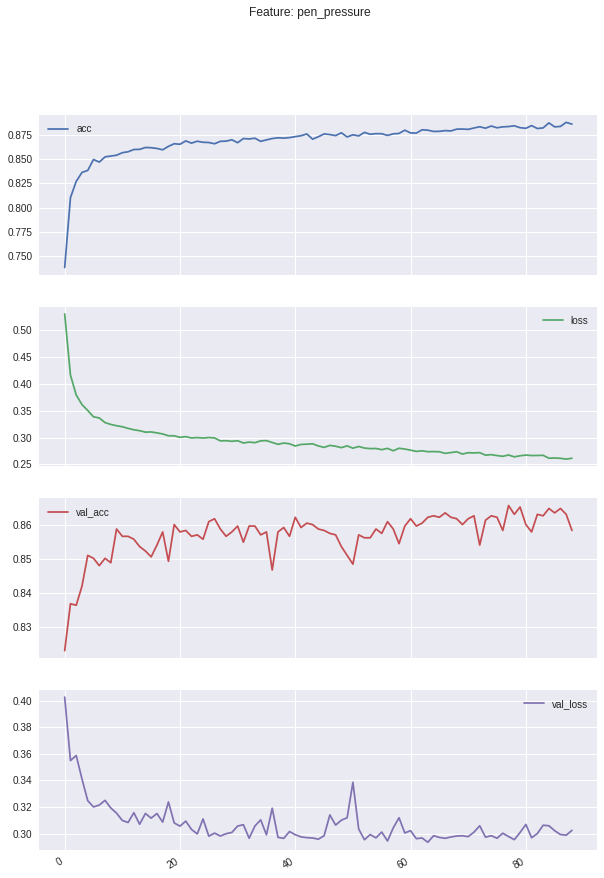

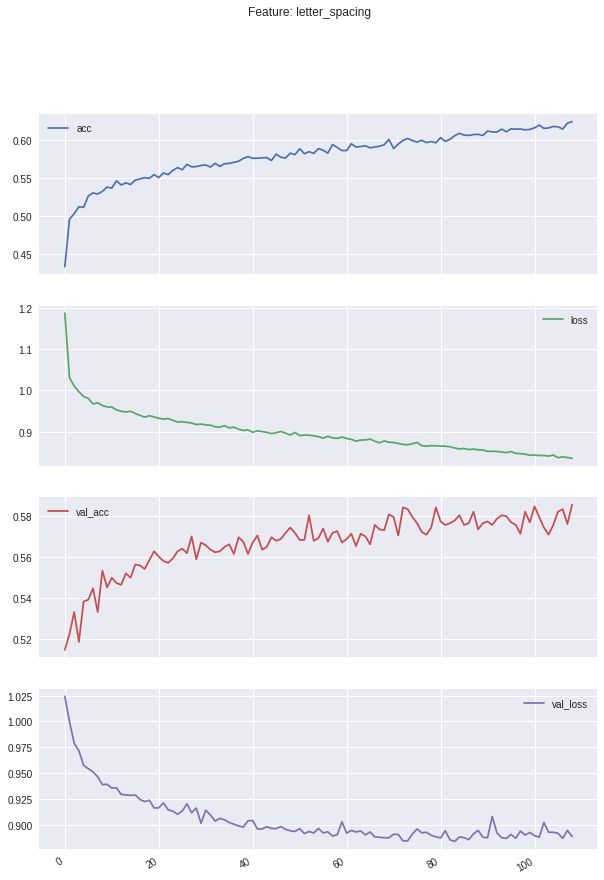

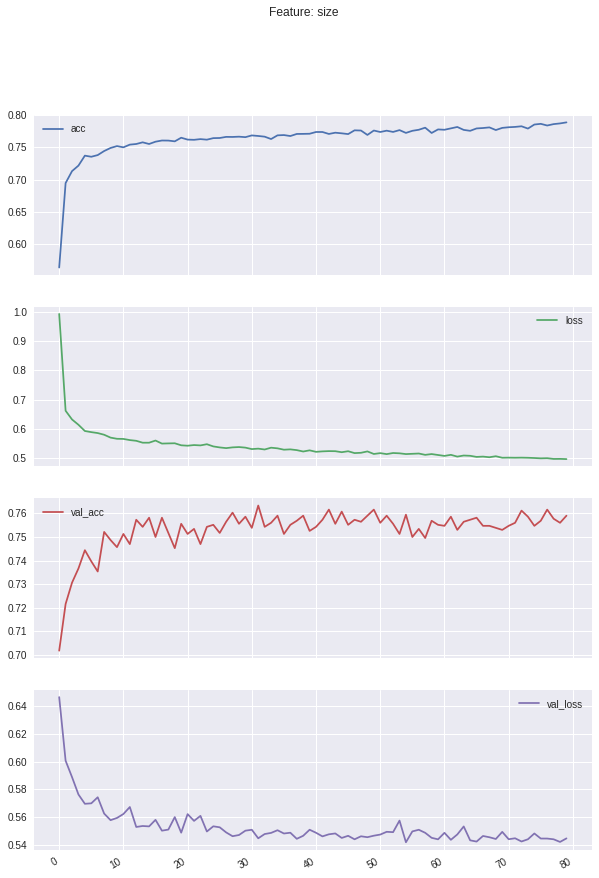

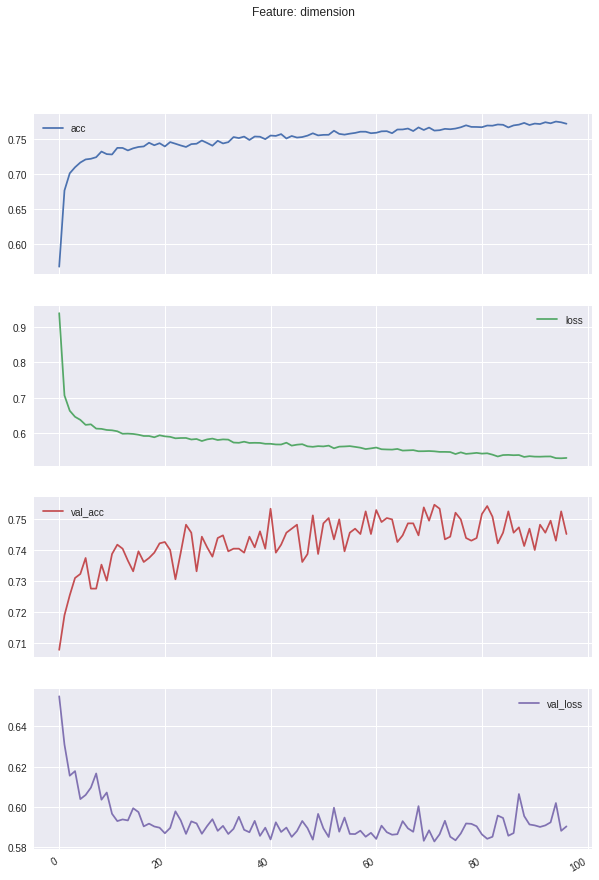

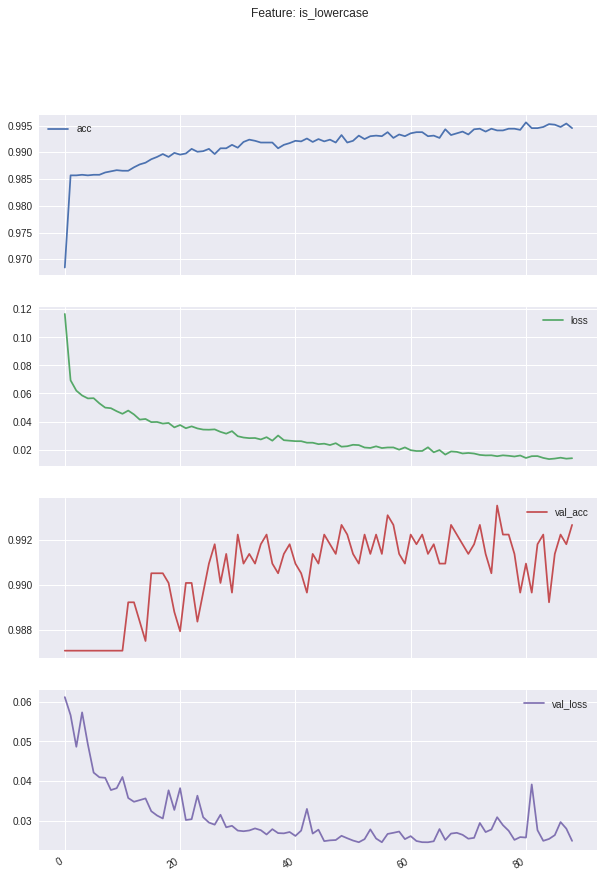

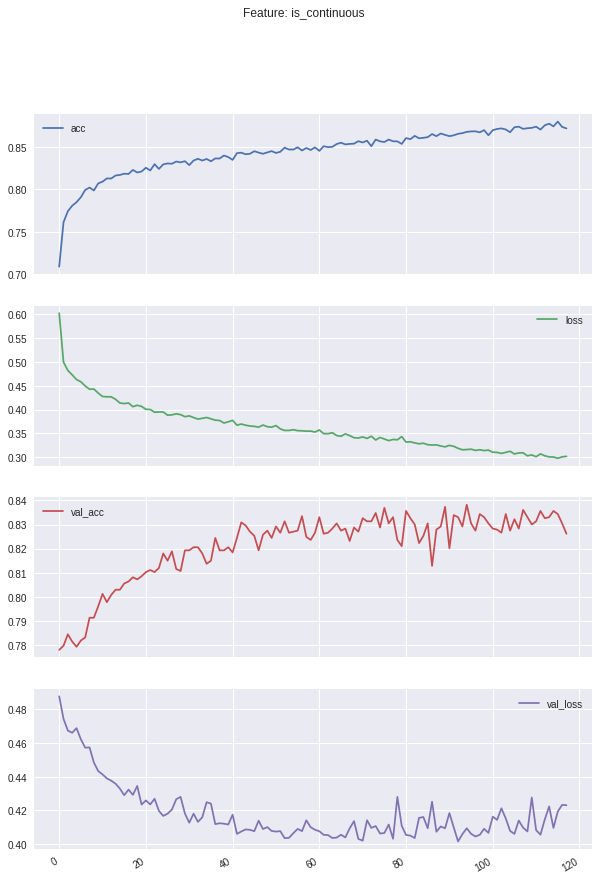

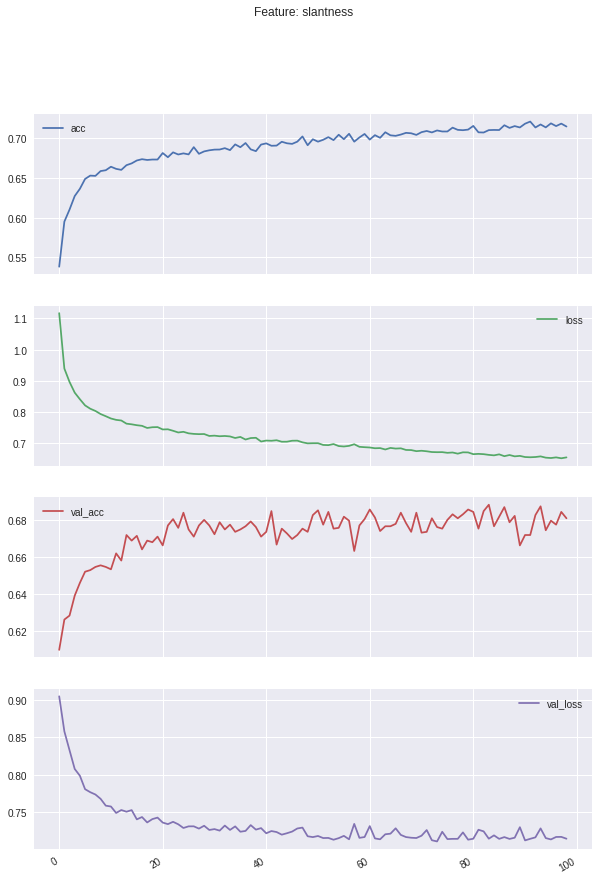

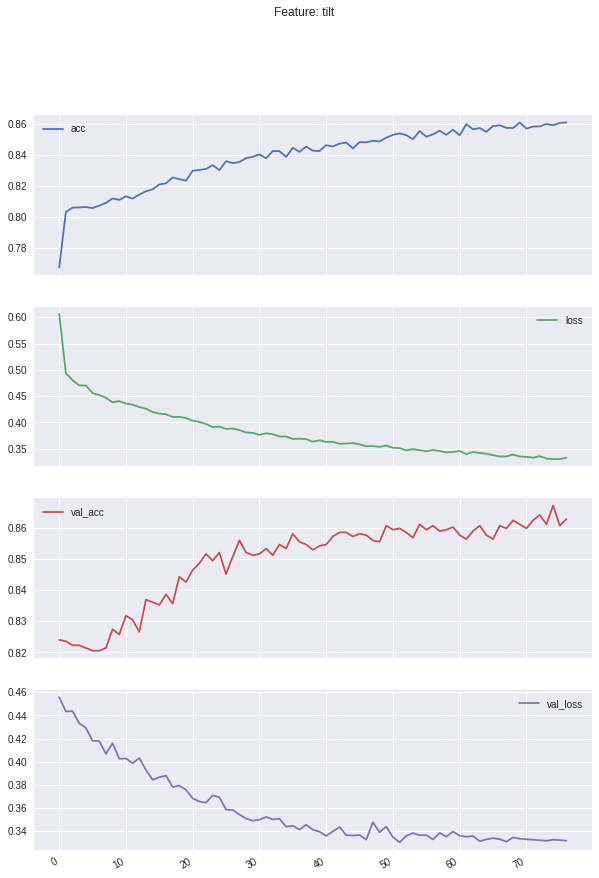

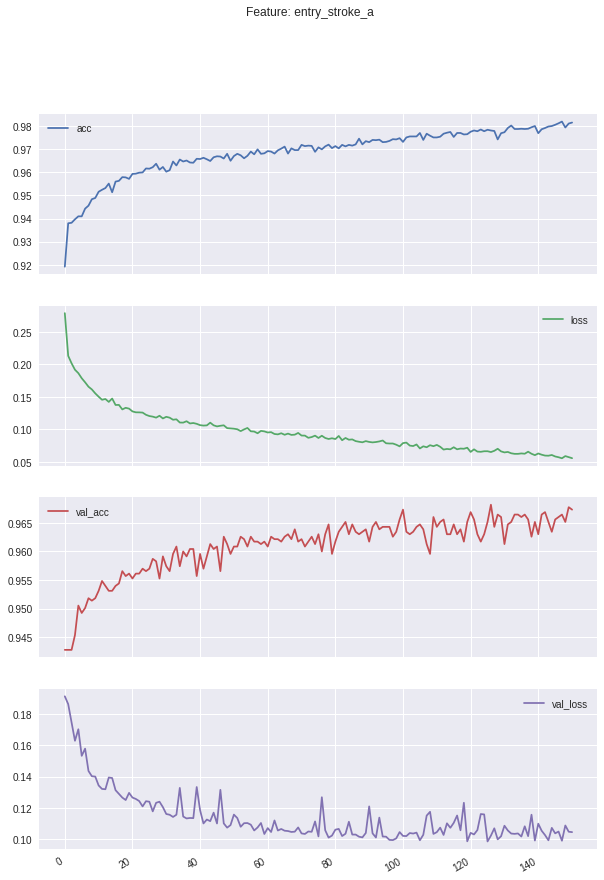

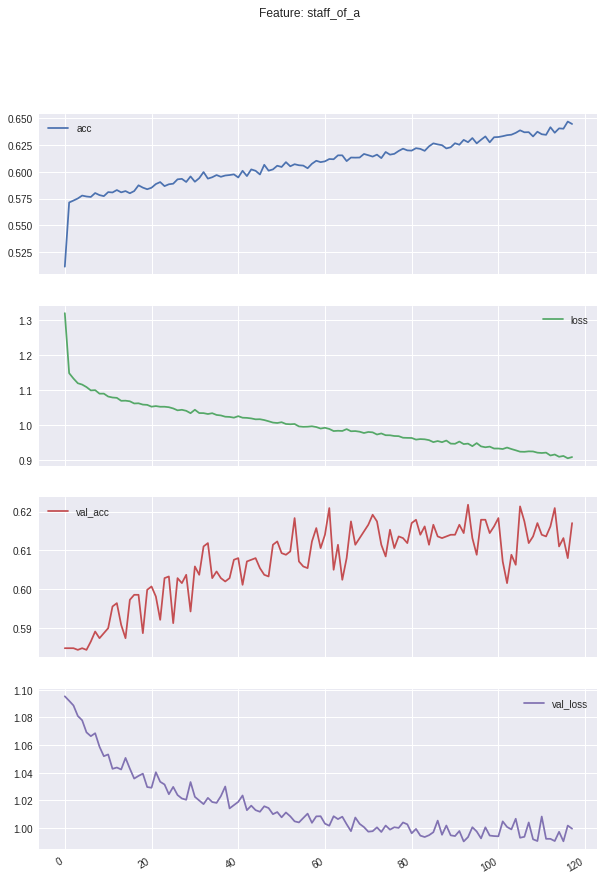

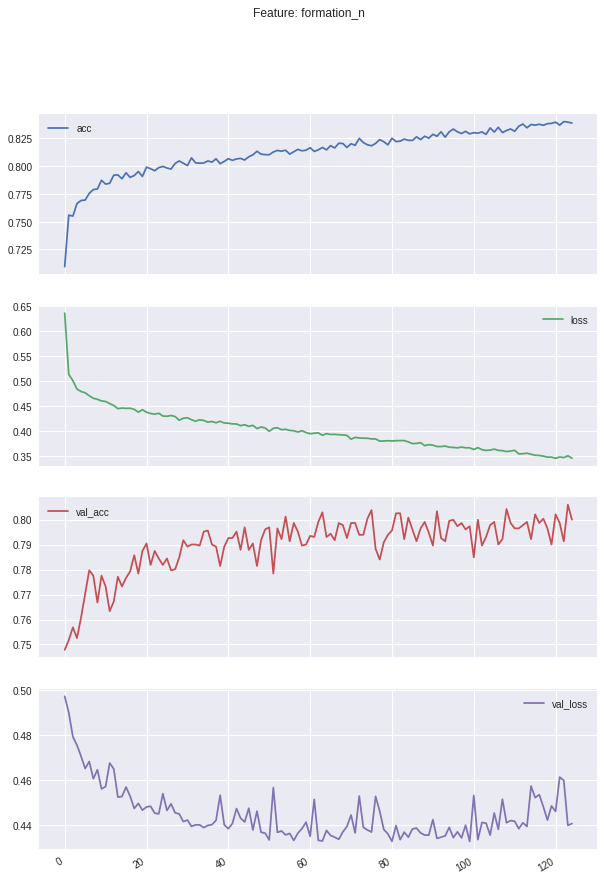

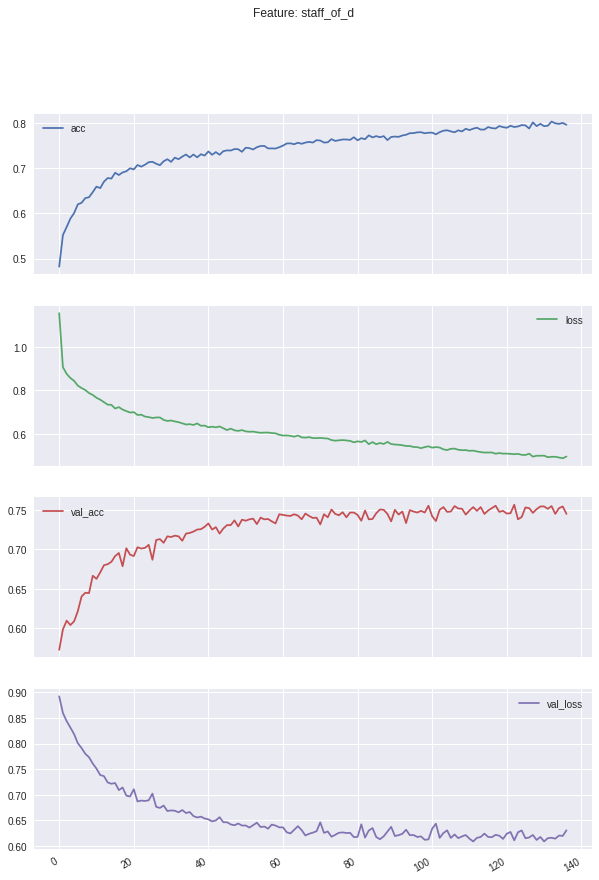

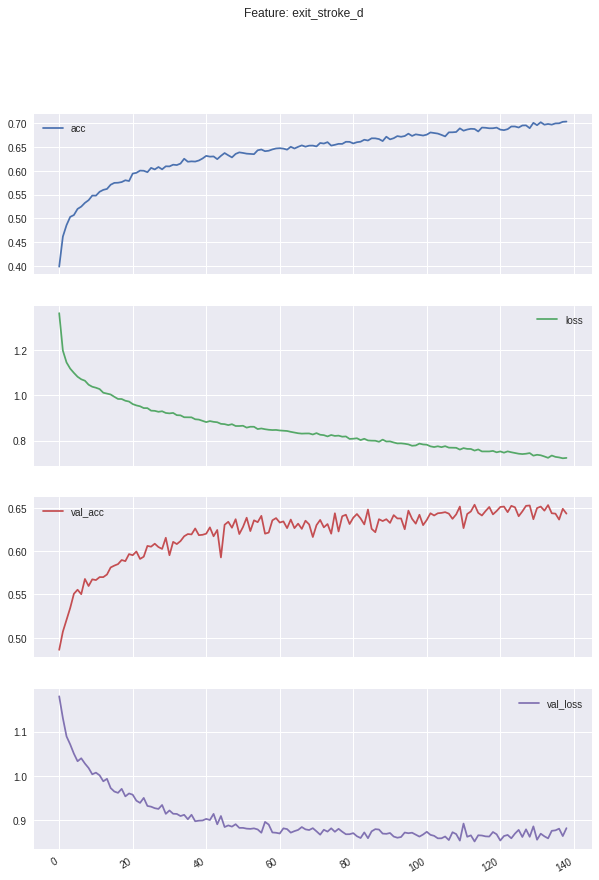

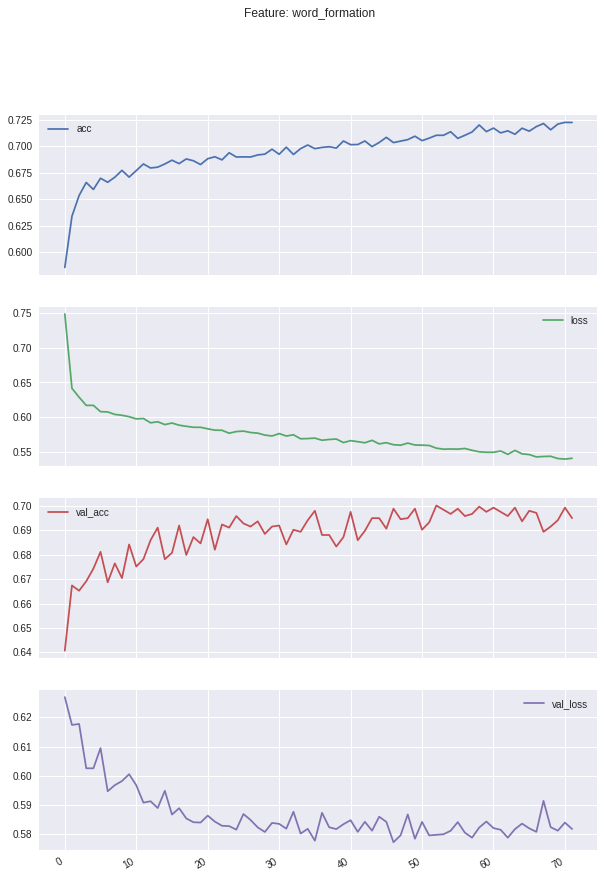

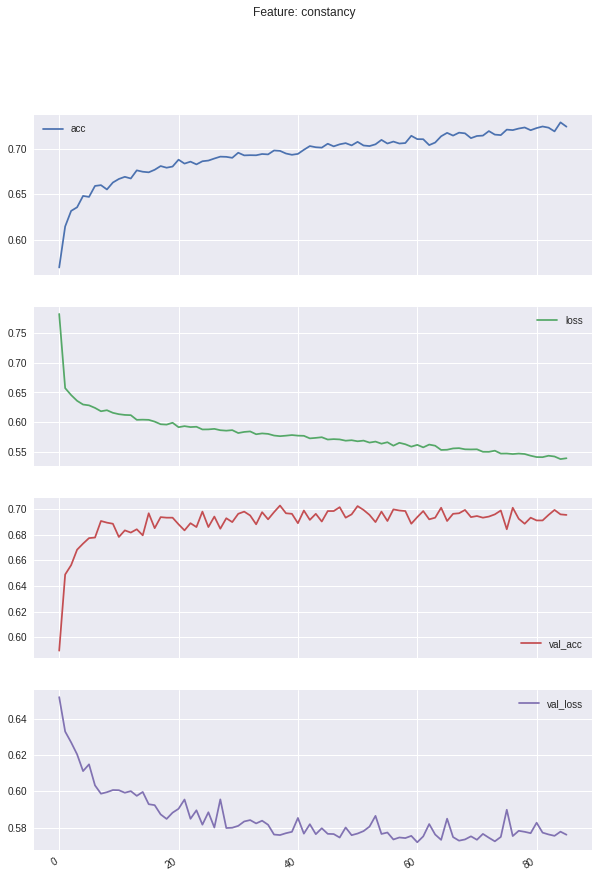

In [124]:
%matplotlib inline
for i in range(0,len(history)):
  h = history[i]
  df = pd.DataFrame(h.history)
  df.plot(subplots=True, grid=True,title = 'Feature: '+f_cols[i],figsize=(10,15))
  #df = pd.DataFrame(h.history)
  #df.plot(subplots=True, grid=True,title = 'Feature: '+f_cols[i])

# UNSEEN DATASET

In [102]:
unseenLeftImg,unseenRightImg,unseenTarget = generateValidationSet(unseen_validation_data)
unseenLeftMat,unseenRightMat = generateVaildationImageSet(unseenValidImagePath,unseenLeftImg,unseenRightImg)
unseenTrainMat = generateTraininigImageSet(unseenTrainImagePath)

(7580, 64, 64, 1)
(7580, 64, 64, 1)
(12906, 64, 64, 1)


In [104]:
unseenAutoencoder = createAutoEncoder()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 64, 64, 1)         0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 64, 64, 16)        160       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 32, 32, 8)         1160      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 16, 16, 8)         0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 16, 16, 8)         584       
_________________________________________________________________
flatten_3 (Flatten)          (None, 2048)              0         
__________

In [127]:
unseenhistory,unseenTrainedAutoencoder = runAutoncoder(unseenTrainMat,unseenAutoencoder)
unseenTrainedAutoencoder.save('unseenTrainedAutoencoder.h5')

Epoch 1/15
322/322 [==============================] - 94s 291ms/step - loss: 0.2019 - acc: 0.8848 - val_loss: 0.1688 - val_acc: 0.8877
Epoch 2/15
322/322 [==============================] - 85s 263ms/step - loss: 0.1674 - acc: 0.8881 - val_loss: 0.1657 - val_acc: 0.8891
Epoch 3/15
322/322 [==============================] - 84s 260ms/step - loss: 0.1654 - acc: 0.8883 - val_loss: 0.1667 - val_acc: 0.8866
Epoch 4/15
322/322 [==============================] - 84s 261ms/step - loss: 0.1640 - acc: 0.8882 - val_loss: 0.1634 - val_acc: 0.8879
Epoch 5/15
322/322 [==============================] - 87s 269ms/step - loss: 0.1627 - acc: 0.8881 - val_loss: 0.1625 - val_acc: 0.8876
Epoch 6/15
322/322 [==============================] - 85s 262ms/step - loss: 0.1623 - acc: 0.8881 - val_loss: 0.1625 - val_acc: 0.8871
Epoch 7/15
322/322 [==============================] - 84s 261ms/step - loss: 0.1615 - acc: 0.8880 - val_loss: 0.1613 - val_acc: 0.8882
Epoch 8/15
322/322 [==============================] - 8

In [0]:
unseenAutoencoder.load_weights('unseenTrainedAutoencoder.h5')
unseenTrainedAutoencoder=unseenAutoencoder

In [106]:
unseenEncoder = Model(unseenTrainedAutoencoder.inputs, unseenTrainedAutoencoder.get_layer('latent').output)
unseenEncoder.summary()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 64, 64, 1)         0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 64, 64, 16)        160       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 32, 32, 8)         1160      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 16, 16, 8)         0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 16, 16, 8)         584       
_________________________________________________________________
flatten_3 (Flatten)          (None, 2048)              0         
__________

In [107]:
mergedunseen = prepareTrainingSet(unseenTrainImagePath)
mergedunseen = normalizeData(mergedunseen)
imglist = mergedunseen['imagename']
mergedunseen.shape


encunseenTrain = generateFeatuereTraininigImageSet(unseenTrainImagePath,imglist)

predictedunseen = unseenEncoder.predict(encunseenTrain)

predictedunseen.shape

dataset_columns = features_data.columns
feature_lengths = {}
for col in dataset_columns[1:]:
    feature_lengths[col] = len(features_data[col].unique())
feature_lengths = list(feature_lengths.values())
feature_lengths


unseen_feature_models=[]
for i in range(0,len(feature_lengths)):
  unseen_feature_models.append(genFeatureModel(predictedunseen,feature_lengths[i]))
  


 

(12711, 16)

(12711, 64, 64, 1)


(12711, 512)

[2, 3, 3, 3, 2, 2, 4, 2, 2, 4, 2, 3, 4, 2, 2]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_91 (Dense)             (None, 512)               262656    
_________________________________________________________________
activation_91 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout_61 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_92 (Dense)             (None, 64)                32832     
_________________________________________________________________
activation_92 (Activation)   (None, 64)                0         
_________________________________________________________________
dropout_62 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_93 (Dense)             (None, 2)                 130       
__________

In [130]:
f_cols = mergedunseen.columns[1:]
history = []
for i in range(0,len(unseen_feature_models)):
  history.append(runFeatureModel(predictedunseen,mergedunseen[f_cols[i]],unseen_feature_models[i],feature_lengths[i]
                                ,'unseen',str(i))) 

Train on 10168 samples, validate on 2543 samples
Epoch 1/500
10168/10168 [==============================] - 4s 390us/step - loss: 0.5589 - acc: 0.7176 - val_loss: 0.4069 - val_acc: 0.8120
Epoch 2/500
10168/10168 [==============================] - 2s 166us/step - loss: 0.4330 - acc: 0.7997 - val_loss: 0.3729 - val_acc: 0.8297
Epoch 3/500
10168/10168 [==============================] - 2s 166us/step - loss: 0.3941 - acc: 0.8154 - val_loss: 0.3570 - val_acc: 0.8411
Epoch 4/500
10168/10168 [==============================] - 2s 166us/step - loss: 0.3740 - acc: 0.8277 - val_loss: 0.3515 - val_acc: 0.8384
Epoch 5/500
10168/10168 [==============================] - 2s 168us/step - loss: 0.3681 - acc: 0.8316 - val_loss: 0.3481 - val_acc: 0.8364
Epoch 6/500
10168/10168 [==============================] - 2s 161us/step - loss: 0.3544 - acc: 0.8389 - val_loss: 0.3427 - val_acc: 0.8455
Epoch 7/500
10168/10168 [==============================] - 1s 140us/step - loss: 0.3499 - acc: 0.8419 - val_loss: 0.3

In [0]:
for i in range(0,len(unseen_feature_models)):
  unseen_feature_models[i].load_weights('unseen'+str(i)+'_model.h5')

In [109]:
unseenValidSet = prepareValidationSet(unseenValidImagePath)
unseenValidSet = normalizeData(unseenValidSet)
validimglist = unseenValidSet['imagename']
validImgMatrix = generateFeatuereTraininigImageSet(unseenValidImagePath,validimglist)


unseen_img_encoded = unseenEncoder.predict(validImgMatrix)
unseen_img_encoded.shape

accuracy = []
for i in range(0,len(unseen_feature_models)):
  accuracy.append(getAccuracy(unseen_feature_models[i],unseen_img_encoded,unseenValidSet,f_cols[i]))





(859, 64, 64, 1)


(859, 512)

In [110]:
for i in range(0,len(accuracy)):
  
  print(f_cols[i]+" Accuracy :"+ str(accuracy[i]))

print("-------------------------------------------------------------")
print("Overall Accuracy : ", sum(accuracy)/len(accuracy))

pen_pressure Accuracy :86.37951105937137
letter_spacing Accuracy :58.323632130384176
size Accuracy :77.0663562281723
dimension Accuracy :73.69033760186264
is_lowercase Accuracy :98.71944121071013
is_continuous Accuracy :86.0302677532014
slantness Accuracy :66.47264260768335
tilt Accuracy :84.74970896391153
entry_stroke_a Accuracy :96.15832363213038
staff_of_a Accuracy :66.0069848661234
formation_n Accuracy :79.04540162980209
staff_of_d Accuracy :76.60069848661234
exit_stroke_d Accuracy :60.768335273573925
word_formation Accuracy :70.081490104773
constancy Accuracy :69.49941792782305
-------------------------------------------------------------
Overall Accuracy :  76.63950329840901


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f6711ad79e8>,
      dtype=object)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f670f3b5048>,
      dtype=object)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f670f26e978>,
      dtype=object)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f670f0c5208>,
      dtype=object)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f670f00f978>,
      dtype=object)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f670e6a97b8>,
      dtype=object)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f670e513b38>,
      dtype=object)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f670e377198>,
      dtype=object)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f670e24c198>,
      dtype=object)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f670e11b128>,
      dtype=object)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f670df77588>,
      dtype=object)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f670de0f0f0>,
      dtype=object)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f670dc95208>,
      dtype=object)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f670db28198>,
      dtype=object)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f670d983208>,
      dtype=object)

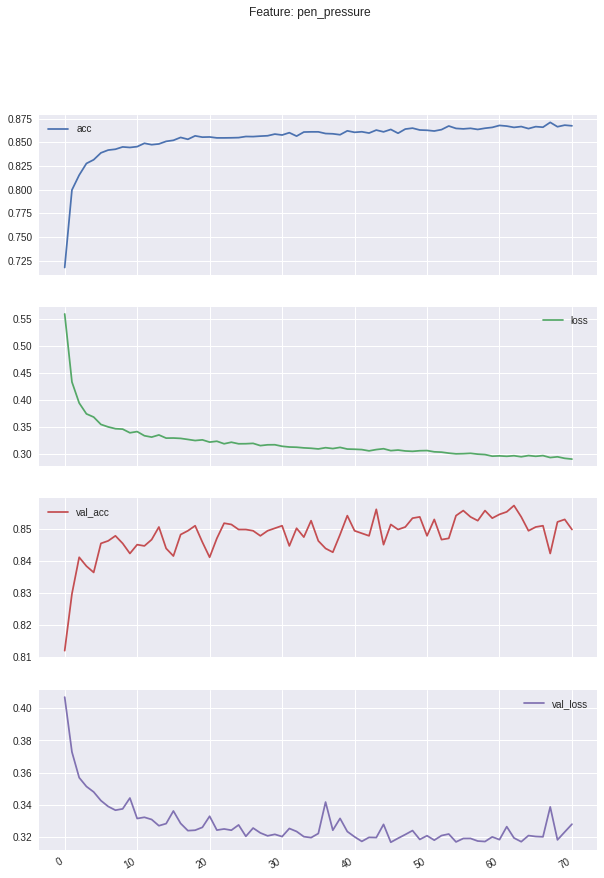

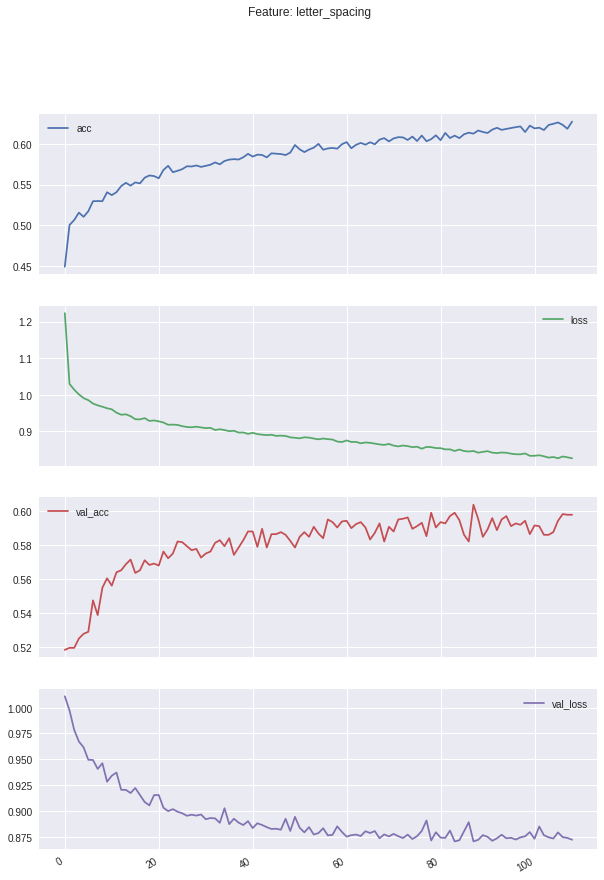

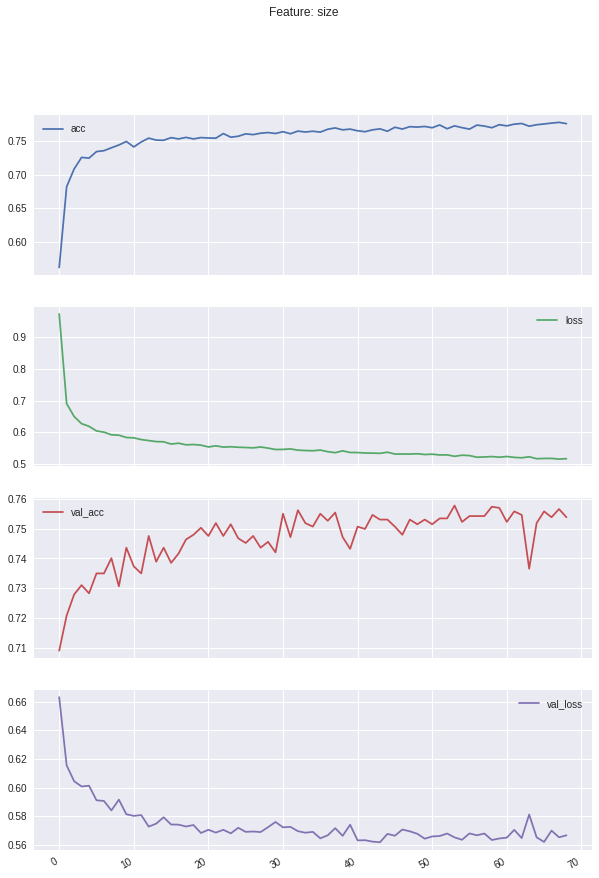

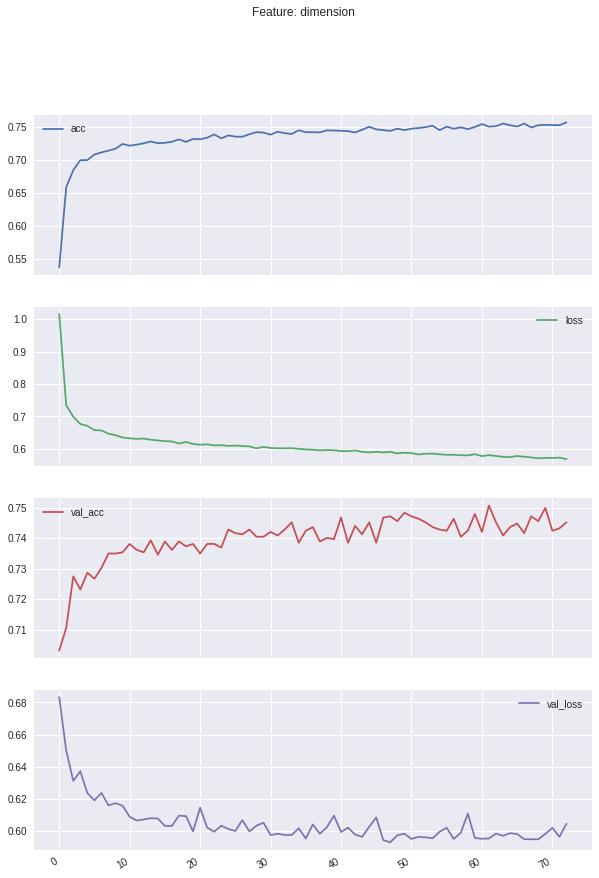

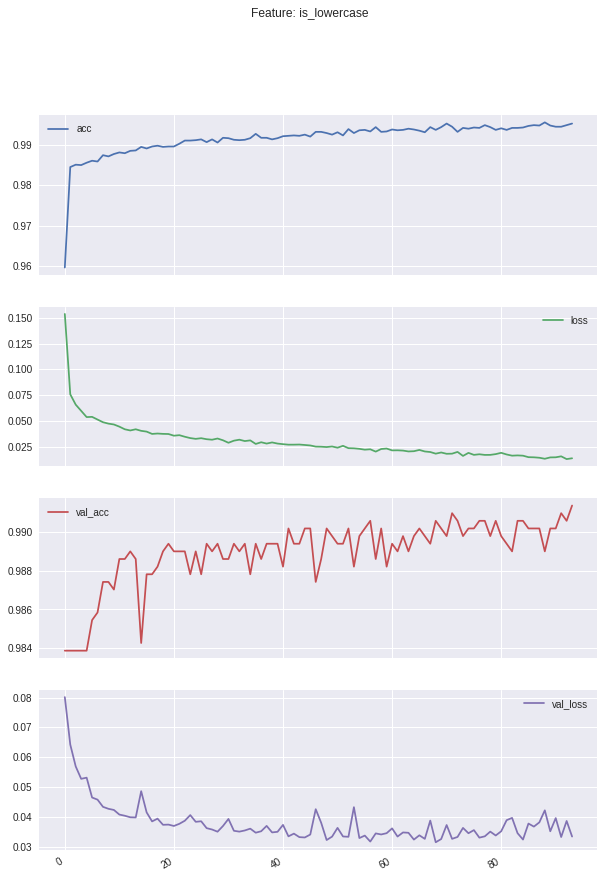

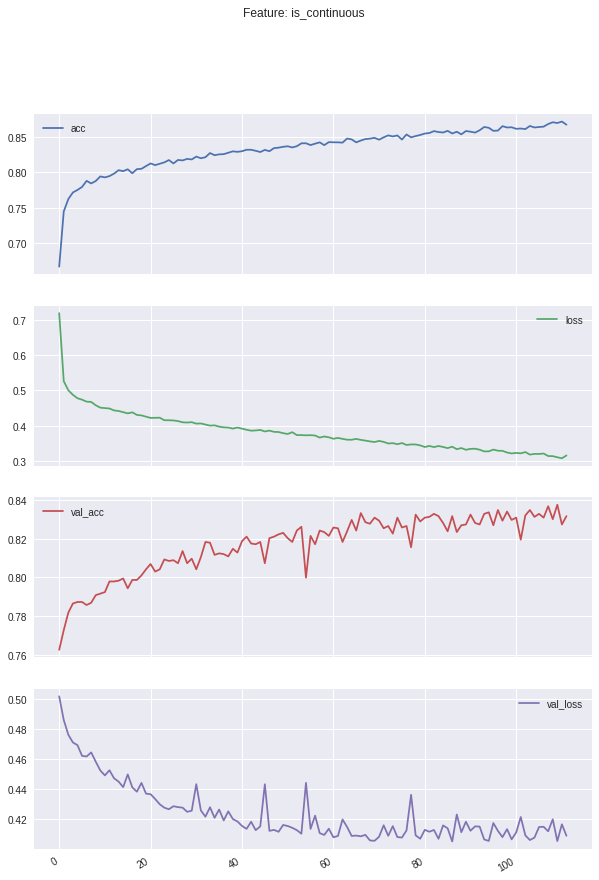

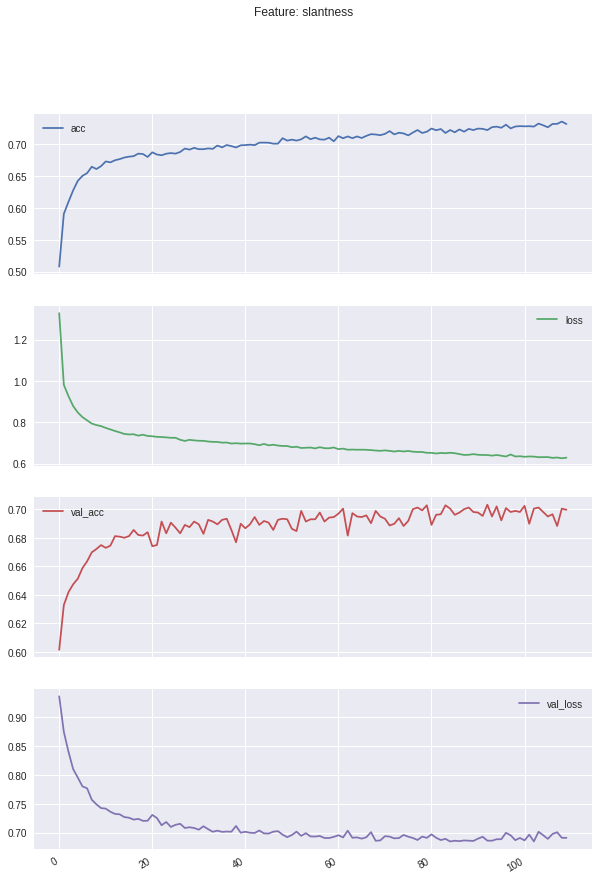

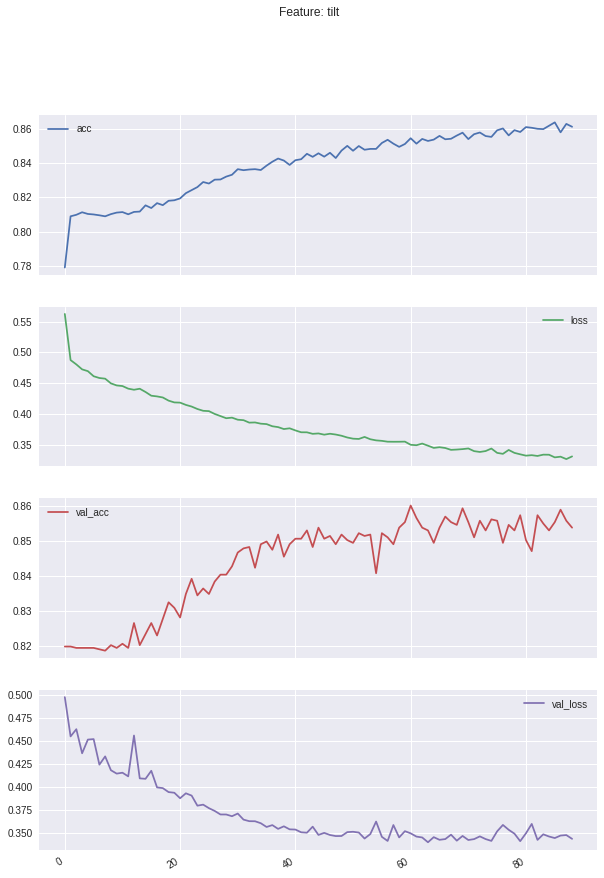

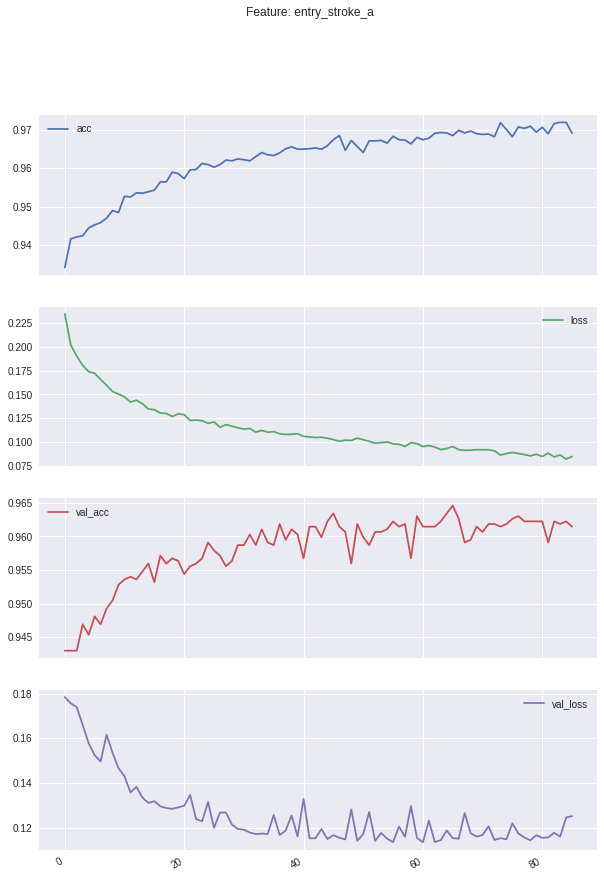

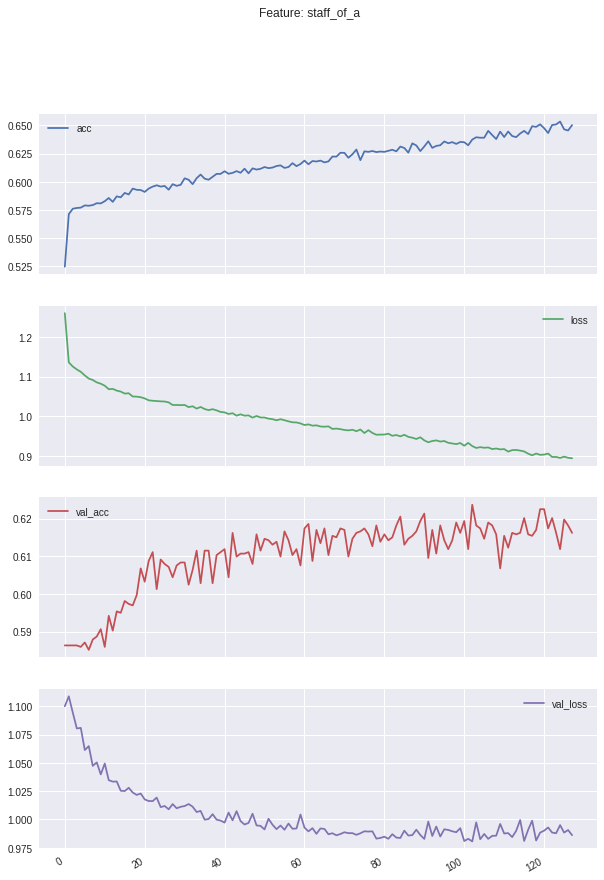

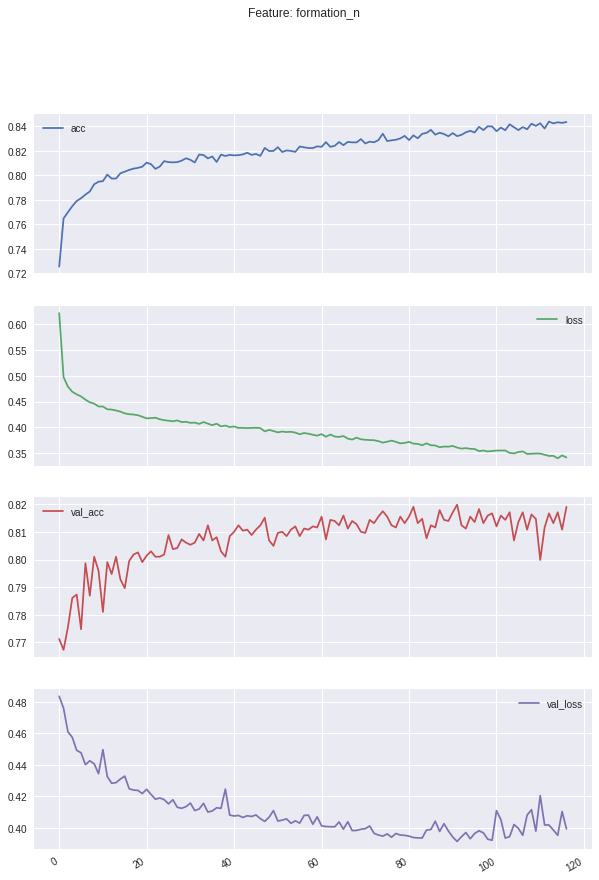

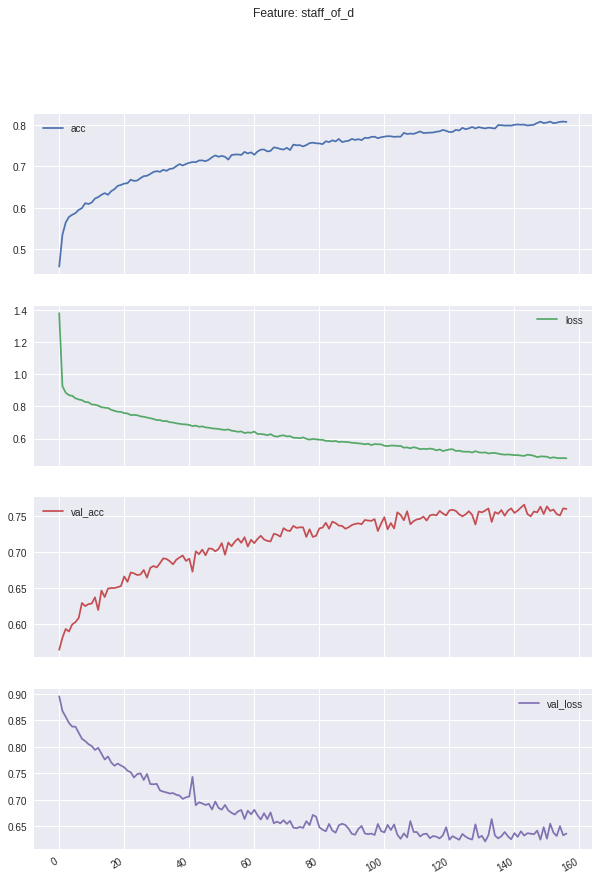

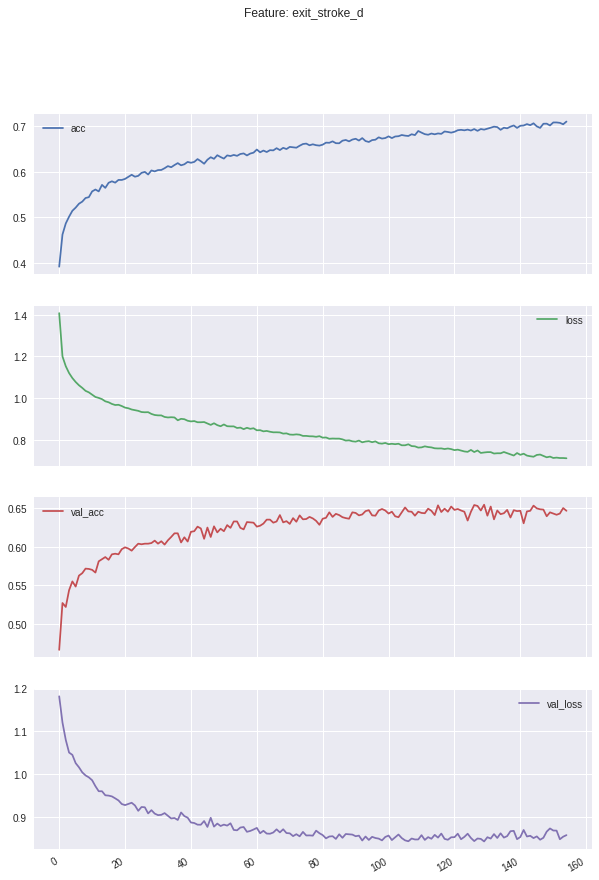

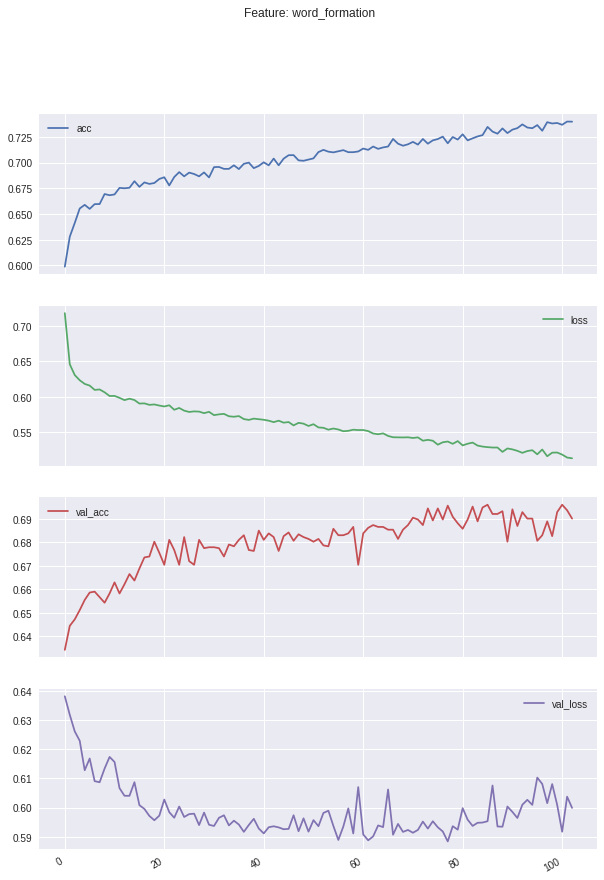

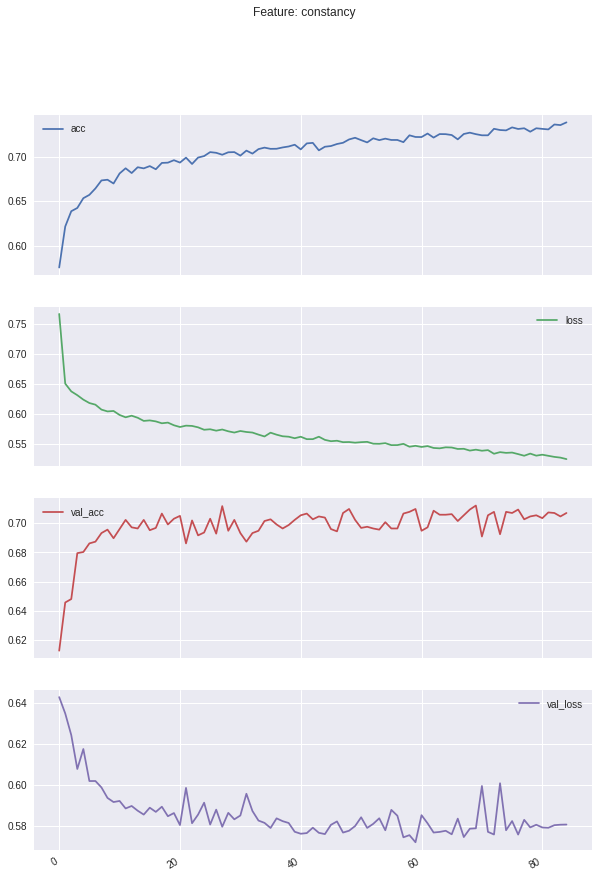

In [133]:
%matplotlib inline
for i in range(0,len(history)):
  h = history[i]
  df = pd.DataFrame(h.history)
  df.plot(subplots=True, grid=True,title = 'Feature: '+f_cols[i],figsize=(10,15))
  #df = pd.DataFrame(h.history)
  #df.plot(subplots=True, grid=True,title = 'Feature: '+f_cols[i])

In [0]:
#!unzip shuffled-dataset.zip

**EXPLAINABLE DEEP LEARNING MODEL USING COSINE SIMILARITY BETWEEN IMAGES**

**SEEN DATASET ANALYSIS**

**DIFFERENT WRITER SIMILARITY EXPLAINATION**

In [0]:
def cos_sim(a, b):
    dot_product = np.dot(a, b)
    norm_a = np.linalg.norm(a)
    norm_b = np.linalg.norm(b)
    return dot_product / (norm_a * norm_b)

In [0]:

seen_left_img_encoded = seenEncoder.predict(seenLeftMat)
seen_right_img_encoded = seenEncoder.predict(seenRightMat)

In [208]:
print("This is different writer pair")
print(seenLeftImg[0],seenRightImg[0])
seenTarget[0]

This is different writer pair
0901a_num1.png 1356a_num1.png


0

In [0]:
predicted = []
from numpy import dot
from numpy.linalg import norm

a = seen_left_img_encoded[0]
b = seen_right_img_encoded[0]
   

In [210]:
print("Overall Cosine Similarity for different writer", cos_sim(a,b))

Overall Cosine Similarity for different writer 0.9029106


In [0]:
predicted_left = []
predicted_right = []
for i in range(0,len(seen_feature_models)):
  predicted_left.append(seen_feature_models[i].predict(seen_left_img_encoded))
  
  predicted_right.append(seen_feature_models[i].predict(seen_right_img_encoded))
  

In [211]:
for i in range(0,15):
  print("Feature "+ str(f_cols[i])+": " +str(cos_sim(predicted_left[i][0],predicted_right[i][0])))


Feature pen_pressure: 0.17911169
Feature letter_spacing: 0.6155484
Feature size: 0.075378455
Feature dimension: 0.18585913
Feature is_lowercase: 0.99999845
Feature is_continuous: 0.04761077
Feature slantness: 0.09898597
Feature tilt: 0.9954446
Feature entry_stroke_a: 0.9999898
Feature staff_of_a: 0.8751897
Feature formation_n: 0.7517686
Feature staff_of_d: 0.962313
Feature exit_stroke_d: 0.5739865
Feature word_formation: 0.5391896
Feature constancy: 0.61308074


**SAME WRITER SIMILARITY EXPLAINATION**

In [187]:
print("This is same writer pair")
print(seenLeftImg[4],seenRightImg[4])
seenTarget[4]

This is same writer pair
0810a_num1.png 0810a_num2.png


1

In [198]:

left = seen_left_img_encoded[4]
right = seen_right_img_encoded[4]

print("Overall Cosine Similarity for same writer",cos_sim(left,right))

Overall Cosine Similarity for same writer 0.9988223


In [201]:
for i in range(0,15):
  print("Feature "+ str(f_cols[i])+": " +str(cos_sim(predicted_left[i][4],predicted_right[i][4])))


Feature pen_pressure: 0.9921584
Feature letter_spacing: 0.98206854
Feature size: 0.99034923
Feature dimension: 0.99455
Feature is_lowercase: 1.0
Feature is_continuous: 0.9999934
Feature slantness: 0.9727099
Feature tilt: 0.9999415
Feature entry_stroke_a: 0.9999997
Feature staff_of_a: 0.97352886
Feature formation_n: 0.9481722
Feature staff_of_d: 0.988212
Feature exit_stroke_d: 0.99870217
Feature word_formation: 0.96727735
Feature constancy: 0.9804111


In [0]:
#!unzip unseen-dataset.zip

In [0]:
def getScore(left_img,right_img):
  
  predicted_label=[]
  for i in range(0,len(left_img[0])):
    count=0
    for j in range(0,15):
      if(left_img[j][i] == right_img[j][i]):
        count = count+1
    
    if(count>=11):
      predicted_label.append(1)
    else:
      predicted_label.append(0)
  
  return predicted_label

In [0]:
left_img = []
right_img = []
for i in range(0,len(seen_feature_models)):
  x = seen_feature_models[i].predict(seen_left_img_encoded)
  y = seen_feature_models[i].predict(seen_right_img_encoded)
  a = []
  b = []
  for j in range(0,len(x)):
    f1 = x[j].argmax()
    f2 = y[j].argmax()
    a.append(f1)
    b.append(f2)
  left_img.append(a)
  right_img.append(b)

In [0]:
test = getScore(left_img,right_img)

In [90]:
from sklearn.metrics import accuracy_score

print("Seen Overall Validation Accuracy: ",accuracy_score(seenTarget,test)*100)

Seen Overall Validation Accuracy:  80.3532008830022


**SHUFFLED DATA ANALYSIS**

In [0]:
shuffled_left_img_encoded = shuffledEncoder.predict(shuffledLeftMat)
shuffled_right_img_encoded = shuffledEncoder.predict(shuffledRightMat)

**SAME WRITER SIMILARITY ANALYSIS**

In [115]:
print("This is same writer pair")
print(shuffledLeftImg[0],shuffledRightImg[0])
shuffledTarget[0]

This is same writer pair
0505a_num1.png 0505c_num3.png


1

In [114]:
a = shuffled_left_img_encoded[0]
b = shuffled_right_img_encoded[0]
print("Overall Cosine Similarity for same writer", cos_sim(a,b))

predicted_left = []
predicted_right = []
for i in range(0,len(shuffled_feature_models)):
  predicted_left.append(shuffled_feature_models[i].predict(shuffled_left_img_encoded))
  
  predicted_right.append(shuffled_feature_models[i].predict(shuffled_right_img_encoded))

for i in range(0,15):
  print("Feature "+ str(f_cols[i])+": " +str(cos_sim(predicted_left[i][0],predicted_right[i][0])))  

Overall Cosine Similarity for same writer 0.9903113
Feature pen_pressure: 0.9993098
Feature letter_spacing: 0.99158925
Feature size: 0.9917245
Feature dimension: 0.9804437
Feature is_lowercase: 1.0
Feature is_continuous: 0.82231426
Feature slantness: 0.9335989
Feature tilt: 0.9624268
Feature entry_stroke_a: 1.0
Feature staff_of_a: 0.99858004
Feature formation_n: 0.9999993
Feature staff_of_d: 0.9989121
Feature exit_stroke_d: 0.6376426
Feature word_formation: 0.998751
Feature constancy: 0.9983057


**DIFFERENT WRITER SIMILARITY ANALYSIS**

In [129]:
print("This is different writer pair")
print(shuffledLeftImg[3],shuffledRightImg[3])
shuffledTarget[3]

This is different writer pair
1165aa_num1.png 0362b_num3.png


0

In [128]:
a = shuffled_left_img_encoded[3]
b = shuffled_right_img_encoded[3]
print("Overall Cosine Similarity for same writer", cos_sim(a,b))

predicted_left = []
predicted_right = []
for i in range(0,len(shuffled_feature_models)):
  predicted_left.append(shuffled_feature_models[i].predict(shuffled_left_img_encoded))
  
  predicted_right.append(shuffled_feature_models[i].predict(shuffled_right_img_encoded))

for i in range(0,15):
  print("Feature "+ str(f_cols[i])+": " +str(cos_sim(predicted_left[i][3],predicted_right[i][3])))  

Overall Cosine Similarity for same writer 0.95192266
Feature pen_pressure: 0.08762187
Feature letter_spacing: 0.9738395
Feature size: 0.6495972
Feature dimension: 0.51114035
Feature is_lowercase: 0.99953246
Feature is_continuous: 0.99814874
Feature slantness: 0.9562872
Feature tilt: 0.99784863
Feature entry_stroke_a: 0.73121125
Feature staff_of_a: 0.856844
Feature formation_n: 0.9999954
Feature staff_of_d: 0.20109794
Feature exit_stroke_d: 0.29984877
Feature word_formation: 0.9657261
Feature constancy: 0.98169136


In [132]:
left_img = []
right_img = []
for i in range(0,len(shuffled_feature_models)):
  x = shuffled_feature_models[i].predict(shuffled_left_img_encoded)
  y = shuffled_feature_models[i].predict(shuffled_right_img_encoded)
  a = []
  b = []
  for j in range(0,len(x)):
    f1 = x[j].argmax()
    f2 = y[j].argmax()
    a.append(f1)
    b.append(f2)
  left_img.append(a)
  right_img.append(b)

test = getScore(left_img,right_img)  
print("Shuffled Overall Validation Accuracy: ",accuracy_score(shuffledTarget,test)*100)  

Shuffled Overall Validation Accuracy:  65.56354009077155


**UNSEEN DATA ANALYSIS**

In [0]:
unseen_left_img_encoded = unseenEncoder.predict(unseenLeftMat)
unseen_right_img_encoded = unseenEncoder.predict(unseenRightMat)

**SAME WRITER SIMILARITY ANALYSIS**

In [135]:
print("This is same writer pair")
print(unseenLeftImg[0],unseenRightImg[0])
unseenTarget[0]

This is same writer pair
1566b_num1.png 1566a_num2.png


1

In [136]:
a = unseen_left_img_encoded[0]
b = unseen_right_img_encoded[0]
print("Overall Cosine Similarity for same writer", cos_sim(a,b))

predicted_left = []
predicted_right = []
for i in range(0,len(unseen_feature_models)):
  predicted_left.append(unseen_feature_models[i].predict(unseen_left_img_encoded))
  
  predicted_right.append(unseen_feature_models[i].predict(unseen_right_img_encoded))

for i in range(0,15):
  print("Feature "+ str(f_cols[i])+": " +str(cos_sim(predicted_left[i][0],predicted_right[i][0])))  

Overall Cosine Similarity for same writer 0.9929979
Feature pen_pressure: 0.8732012
Feature letter_spacing: 0.9780623
Feature size: 0.9931915
Feature dimension: 0.8968919
Feature is_lowercase: 0.9999424
Feature is_continuous: 0.9964249
Feature slantness: 0.93154603
Feature tilt: 0.9914537
Feature entry_stroke_a: 0.96811366
Feature staff_of_a: 0.9932327
Feature formation_n: 0.99109477
Feature staff_of_d: 0.998526
Feature exit_stroke_d: 0.93994725
Feature word_formation: 0.95030725
Feature constancy: 0.8480238


**DIFFERENT WRITER SIMILARITY ANALYSIS**

In [144]:
print("This is different writer pair")
print(unseenLeftImg[5],unseenRightImg[5])
unseenTarget[5]

This is different writer pair
1453b_num4.png 1565c_num5.png


0

In [143]:
a = unseen_left_img_encoded[5]
b = unseen_right_img_encoded[5]
print("Overall Cosine Similarity for same writer", cos_sim(a,b))

predicted_left = []
predicted_right = []
for i in range(0,len(unseen_feature_models)):
  predicted_left.append(unseen_feature_models[i].predict(unseen_left_img_encoded))
  
  predicted_right.append(unseen_feature_models[i].predict(unseen_right_img_encoded))

for i in range(0,15):
  print("Feature "+ str(f_cols[i])+": " +str(cos_sim(predicted_left[i][5],predicted_right[i][5])))  

Overall Cosine Similarity for same writer 0.95289993
Feature pen_pressure: 0.99998355
Feature letter_spacing: 0.90788794
Feature size: 0.6048312
Feature dimension: 0.4573157
Feature is_lowercase: 1.0
Feature is_continuous: 0.20709683
Feature slantness: 0.04658333
Feature tilt: 0.98860663
Feature entry_stroke_a: 0.9980573
Feature staff_of_a: 0.98293984
Feature formation_n: 0.99950665
Feature staff_of_d: 0.9962968
Feature exit_stroke_d: 0.9663771
Feature word_formation: 0.83300966
Feature constancy: 0.89209825


In [145]:
left_img = []
right_img = []
for i in range(0,len(unseen_feature_models)):
  x = unseen_feature_models[i].predict(unseen_left_img_encoded)
  y = unseen_feature_models[i].predict(unseen_right_img_encoded)
  a = []
  b = []
  for j in range(0,len(x)):
    f1 = x[j].argmax()
    f2 = y[j].argmax()
    a.append(f1)
    b.append(f2)
  left_img.append(a)
  right_img.append(b)

test = getScore(left_img,right_img)  
print("Unseen Overall Validation Accuracy: ",accuracy_score(unseenTarget,test)*100)  

Unseen Overall Validation Accuracy:  72.12401055408971
